**Maestría:**

Ciencia de Datos y Máquinas de Aprendizaje

**Asignatura:**

Neural Networks: Deep Learning

**Integrantes:**

*   Freddy Lituma Perero
*   Ivan Ortega Salas
*   Juan Suárez León
*   Eleanor Varela Tapia

# Carga de datos

In [ ]:
# Librerías

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler



Dataset https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data

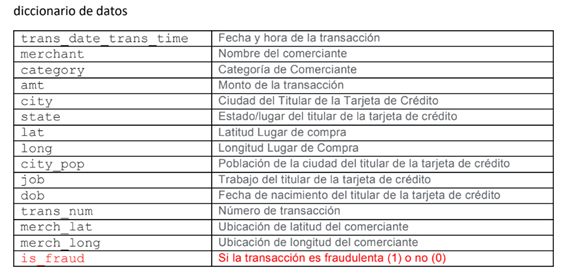

In [ ]:
# Carga dataset de https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eleanorvarela","key":"b3c2acdca9667f757c655afb74c4444f"}'}

In [ ]:
# Crea a directory named kaggle and move kaggle.json file into it
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Cambia los permisos del archivo
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descarga el dataset
!kaggle datasets download -d neharoychoudhury/credit-card-fraud-data

Dataset URL: https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data
License(s): MIT
  0% 0.00/839k [00:00<?, ?B/s]
100% 839k/839k [00:00<00:00, 100MB/s]


In [ ]:
# Descomprime the dataset
!unzip credit-card-fraud-data.zip

Archive:  credit-card-fraud-data.zip
  inflating: fraud_data.csv          


In [ ]:
# Carga los datos usando Pandas
df = pd.read_csv('fraud_data.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


# Preprocesamiento de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [ ]:
# Convierte 'is_fraud' en int
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  int64  
dtypes:

In [ ]:
# tamaño de df
df.shape

(14446, 15)

In [ ]:
# Verificar registros nulos
print(df.isna().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# Verificar registros nulos
print(df.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# verificar registros con el valor de 0
for column in df.columns:
  print(f"Columna '{column}' tiene {df[df[column] == 0].shape[0]} filas con valor 0.")

Columna 'trans_date_trans_time' tiene 0 filas con valor 0.
Columna 'merchant' tiene 0 filas con valor 0.
Columna 'category' tiene 0 filas con valor 0.
Columna 'amt' tiene 0 filas con valor 0.
Columna 'city' tiene 0 filas con valor 0.
Columna 'state' tiene 0 filas con valor 0.
Columna 'lat' tiene 0 filas con valor 0.
Columna 'long' tiene 0 filas con valor 0.
Columna 'city_pop' tiene 0 filas con valor 0.
Columna 'job' tiene 0 filas con valor 0.
Columna 'dob' tiene 0 filas con valor 0.
Columna 'trans_num' tiene 0 filas con valor 0.
Columna 'merch_lat' tiene 0 filas con valor 0.
Columna 'merch_long' tiene 0 filas con valor 0.
Columna 'is_fraud' tiene 12601 filas con valor 0.


In [ ]:
# Verificar filas con valores nulos en cada columna
for column in df.columns:
  null_rows = df[df[column].isnull()]
  if not null_rows.empty:
    print(f"Column '{column}' has null values in the following rows:")
    print(null_rows)

In [ ]:
# mostrar duplicados filas de df
duplicate_rows = df[df.duplicated()]
print("Filas duplicadas:")
duplicate_rows

Filas duplicadas:


,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
8725,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
8857,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
8964,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
8972,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
8982,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,18-01-2019 14:38,Shanahan-Lehne,personal_care,21.54,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,ce3b2734ce646ef6a47b3484a8e043e5,38.211376,-109.986757,1
13372,18-01-2019 22:06,Beier LLC,entertainment,528.98,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,3417f366e2e1d5dd25a3a89a3aae9f3d,39.164469,-109.933543,1
13376,18-01-2019 22:12,Bartoletti and Sons,personal_care,21.23,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,2df9fa2d0e508ed2a83aa3ac6f4b5d5a,38.998205,-110.005615,1
13392,18-01-2019 23:16,Ankunding-Carroll,travel,9.33,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,a0ed41246d201717db7250fa2375c73b,39.230640,-108.990363,1


In [ ]:
# eliminar filas duplicadas
df = df.drop_duplicates()

In [ ]:
# mostrar duplicados filas de df
duplicate_rows = df[df.duplicated()]
print("Filas duplicadas:")
print(duplicate_rows)

Filas duplicadas:
Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, city, state, lat, long, city_pop, job, dob, trans_num, merch_lat, merch_long, is_fraud]
Index: []


In [ ]:
# Verificar duplicados en columnas de df
duplicate_columns = df.columns[df.T.duplicated()]
print("Columnas duplicadas:", duplicate_columns)


Columnas duplicadas: Index([], dtype='object')


In [ ]:
# tamaño de df
df.shape

(14383, 15)

In [ ]:
# Convierte 'dob' y 'trans_date_trans_time' a formato datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [ ]:
# Extrae date, time en columnas separadas
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [ ]:
df['trans_date'].head(1)

,trans_date
0,2019-01-04


In [ ]:
df['trans_time'].head(1)

,trans_time
0,00:58:00


In [ ]:
# Calcula la edad directamente de la resta del año de trans_date
df['age'] = df['trans_date'].apply(lambda x: x.year) - df['dob'].dt.year

In [ ]:
# Extrayendo hour, day, month, year, day_of_week de transaction
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_year'] = df['trans_date_trans_time'].dt.year
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,14383,2019-12-17 13:46:12.614892544,2019-01-01 00:00:00,2019-01-12 17:05:30,2019-08-20 02:10:00,2020-12-27 21:12:30,2020-12-31 23:59:00,NaN
amt,14383.0,122.719068,1.0,11.945,51.29,100.14,3261.47,228.879064
lat,14383.0,39.761571,20.0271,36.7154,39.6662,41.9404,66.6933,5.266532
long,14383.0,-110.835395,-165.6723,-120.2824,-111.0985,-101.136,-89.6287,12.877931
city_pop,14383.0,106392.139331,46.0,493.0,1645.0,35439.0,2383912.0,290043.858658
dob,14383,1971-12-05 11:27:24.691649856,1927-09-09 00:00:00,1961-04-25 00:00:00,1974-01-03 00:00:00,1985-08-21 00:00:00,2001-07-26 00:00:00,NaN
merch_lat,14383.0,39.761755,19.032689,36.768908,39.613766,42.275391,67.510267,5.30919
merch_long,14383.0,-110.836186,-166.670685,-120.095775,-111.203646,-100.55692,-88.646366,12.887765
is_fraud,14383.0,0.123896,0.0,0.0,0.0,0.0,1.0,0.329475
age,14383.0,48.066954,18.0,34.0,46.0,59.0,93.0,17.171371


In [ ]:
# Elimna columnas que no aportan al modelo
df = df.drop(columns=['dob'])

In [ ]:
# Información df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    14383 non-null  datetime64[ns]
 1   merchant                 14383 non-null  object        
 2   category                 14383 non-null  object        
 3   amt                      14383 non-null  float64       
 4   city                     14383 non-null  object        
 5   state                    14383 non-null  object        
 6   lat                      14383 non-null  float64       
 7   long                     14383 non-null  float64       
 8   city_pop                 14383 non-null  int64         
 9   job                      14383 non-null  object        
 10  trans_num                14383 non-null  object        
 11  merch_lat                14383 non-null  float64       
 12  merch_long               14383 non-nu

# EDA

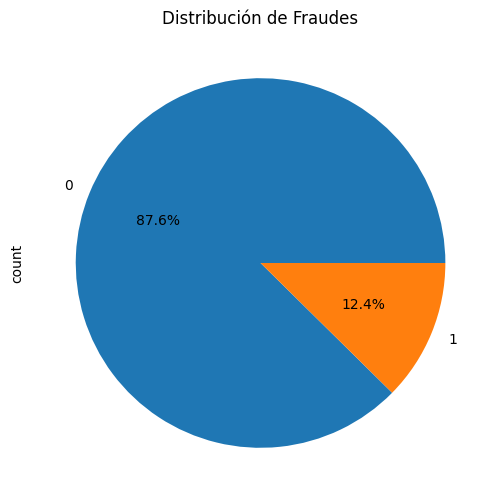

In [ ]:
# Gráfico de pastel de la variable 'is_fraud'
df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribución de Fraudes')
plt.show()

In [ ]:
# Cantidad de registros 'is_fraud'
df['is_fraud'].value_counts()

,count
is_fraud,
0,12601
1,1782


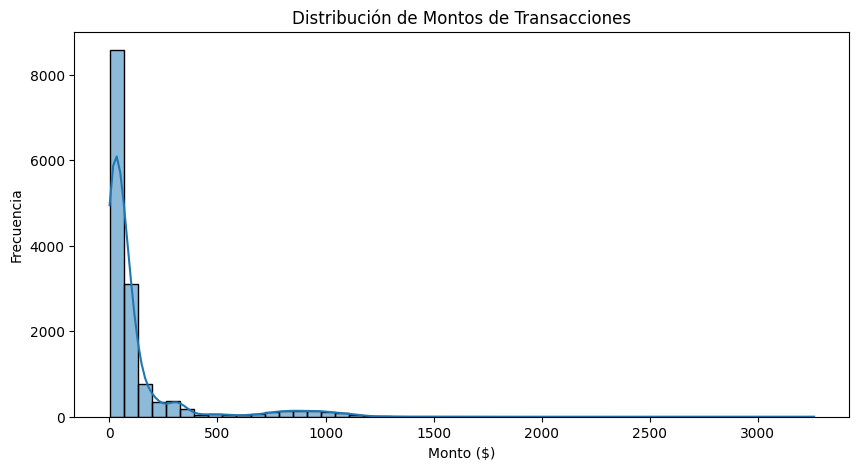

In [ ]:
# Distribucción de montos de transacciones
plt.figure(figsize=(10,5))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.show()

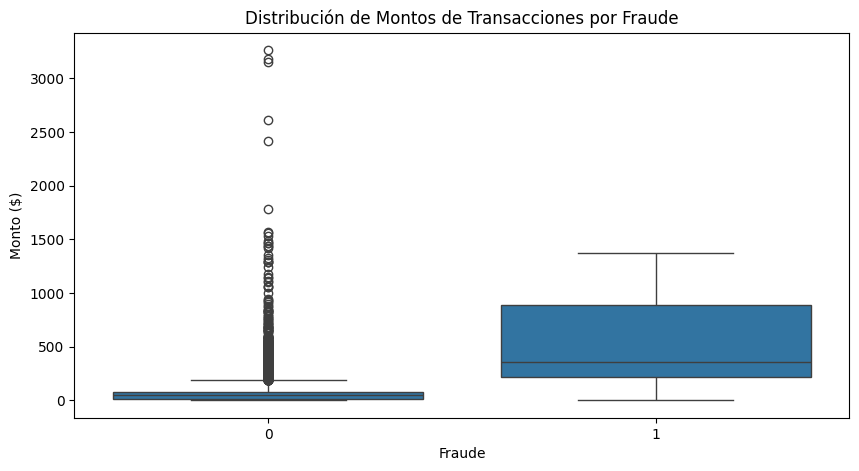

In [ ]:
# Distribución de Montos de Transacciones por Fraude
plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Distribución de Montos de Transacciones por Fraude')
plt.xlabel('Fraude')
plt.ylabel('Monto ($)')
plt.show()

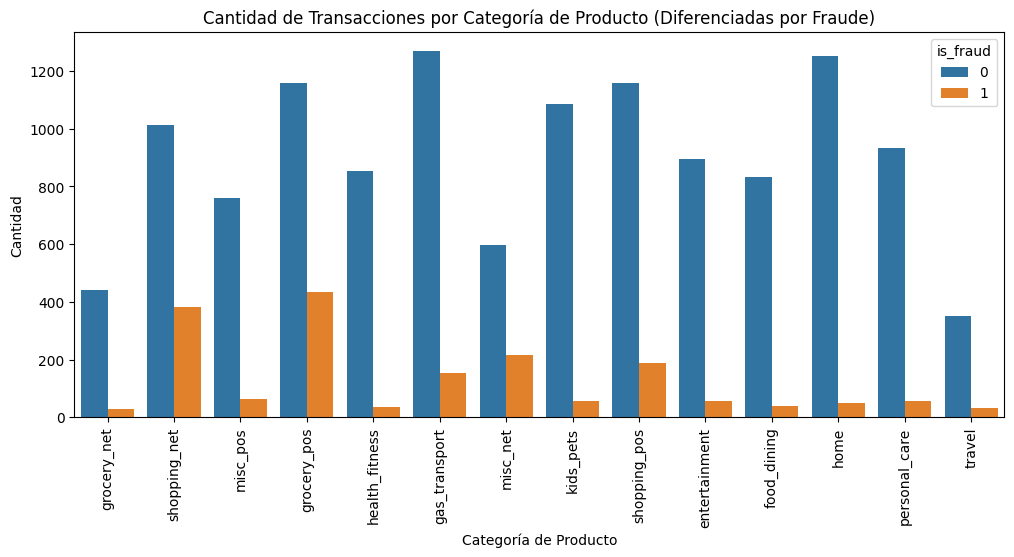

In [ ]:
# Transacciones por Categoría de Producto (category)
import warnings
# Suprimir la advertencia de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12,5))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title('Cantidad de Transacciones por Categoría de Producto (Diferenciadas por Fraude)')
plt.xticks(rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.show()

<Figure size 1200x500 with 0 Axes>

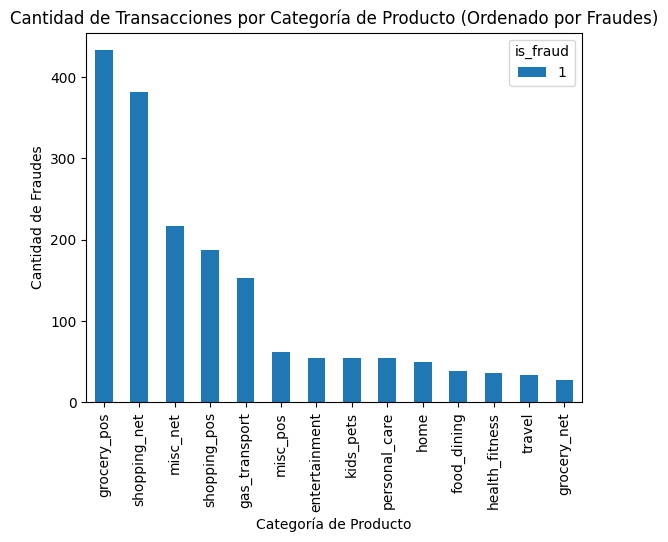

In [ ]:
import matplotlib.pyplot as plt
category_counts = df.groupby(['category', 'is_fraud'])['is_fraud'].count().unstack().fillna(0)
category_counts['total_fraud'] = category_counts[1]
category_counts = category_counts.sort_values('total_fraud', ascending=False)

plt.figure(figsize=(12, 5))
category_counts[[1]].plot(kind='bar')
plt.title('Cantidad de Transacciones por Categoría de Producto (Ordenado por Fraudes)')
plt.xticks(rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Fraudes')
plt.show()


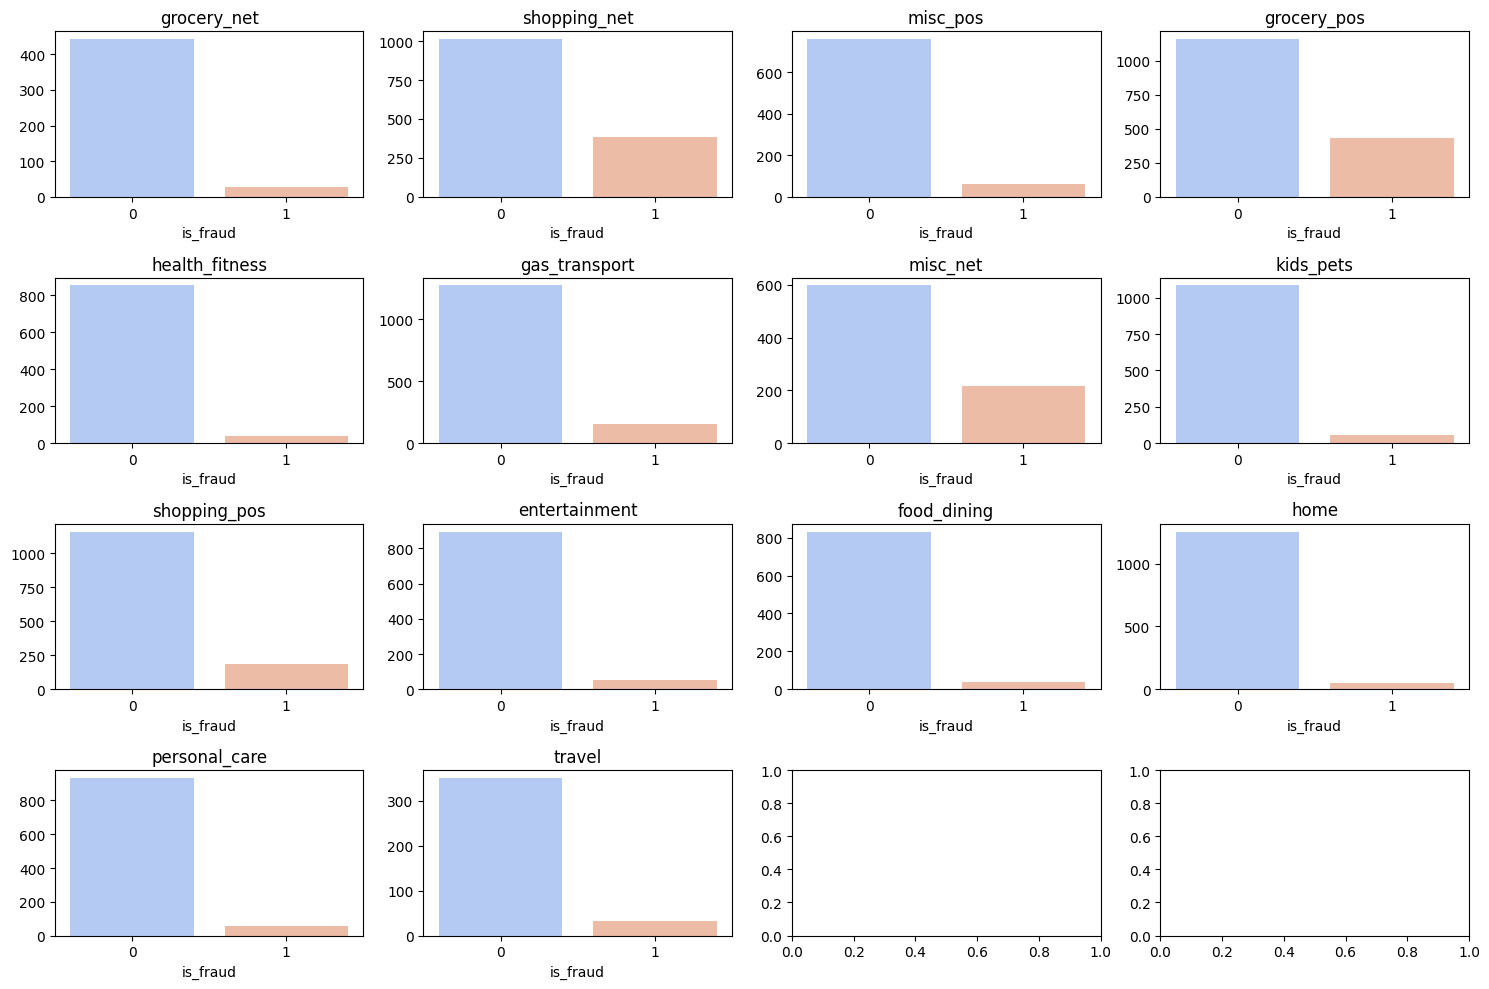

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(15, 10))  # Adjust figsize as needed
ax = ax.flatten()  # Flatten the 2D array to 1D for easy indexing

for i, col in enumerate(df['category'].unique()):
    sns.barplot(
        x=df[df['category'] == col]['is_fraud'].value_counts().index,
        y=df[df['category'] == col]['is_fraud'].value_counts().values,
        ax=ax[i],
        palette='coolwarm',
        color='green'
    )
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

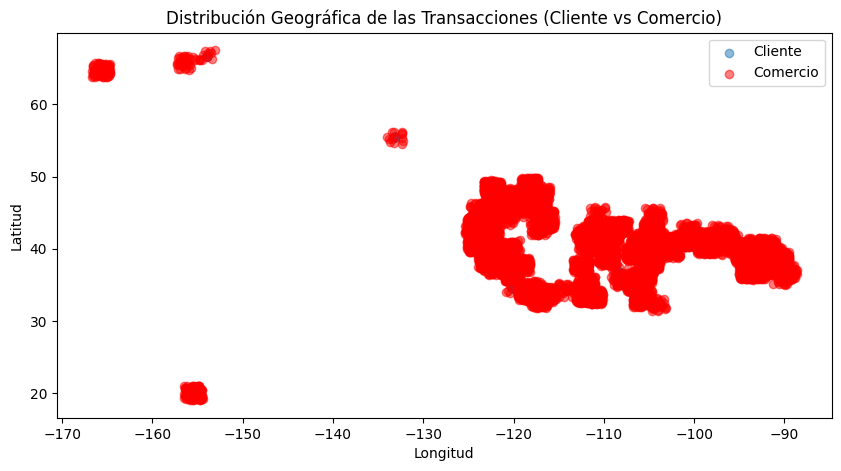

In [ ]:
# Distribución Geográfica de las Transacciones Cliente vs Comercio
plt.figure(figsize=(10,5))
plt.scatter(df['long'], df['lat'], alpha=0.5, label='Cliente')
plt.scatter(df['merch_long'], df['merch_lat'], alpha=0.5, label='Comercio', color='r')
plt.title('Distribución Geográfica de las Transacciones (Cliente vs Comercio)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

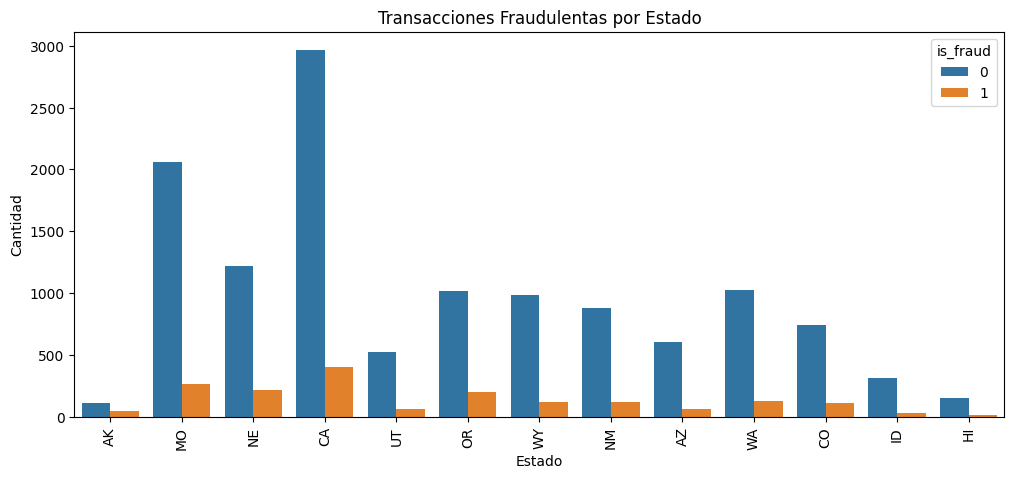

In [ ]:
# Distribución de Fraude por Estado
plt.figure(figsize=(12,5))
sns.countplot(x='state', hue='is_fraud', data=df)
plt.title('Transacciones Fraudulentas por Estado')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Crear un diccionario de estados y sus nombres completos
state_mapping = {
    'GA': 'Georgia',
    'KS': 'Kansas',
    'WV': 'West Virginia',
    'PA': 'Pennsylvania',
    'MA': 'Massachusetts',
    'TX': 'Texas',
    'CA': 'California',
    'IL': 'Illinois',
    'NY': 'New York',
    'FL': 'Florida',
    'MD': 'Maryland',
    'CO': 'Colorado',
    'OH': 'Ohio',
    'NC': 'North Carolina',
    'VA': 'Virginia',
    'WA': 'Washington',
    'NJ': 'New Jersey',
    'MN': 'Minnesota',
    'MI': 'Michigan',
    'NM': 'New Mexico',
    'OR': 'Oregon',
    'MO': 'Missouri',
    'IN': 'Indiana',
    'WI': 'Wisconsin',
    'CT': 'Connecticut',
    'OK': 'Oklahoma',
    'AZ': 'Arizona',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'AL': 'Alabama',
    'NE': 'Nebraska',
    'UT': 'Utah',
    'ID': 'Idaho',
    'RI': 'Rhode Island',
    'SD': 'South Dakota',
    'IA': 'Iowa',
    'NH': 'New Hampshire',
    'ME': 'Maine',
    'VT': 'Vermont',
    'DE': 'Delaware',
    'AK': 'Alaska',
    'MT': 'Montana',
    'AR': 'Arkansas',
    'MS': 'Mississippi',
    'ND': 'North Dakota',
    'WY': 'Wyoming',
    'SC': 'South Carolina',
    'NV': 'Nevada',
    'DC': 'District of Columbia',
    'HI': 'Hawaii',
    'TN': 'Tennessee',
    'MD': 'Maryland'
}

# Reemplazar los códigos de estado con sus nombres completos
df['state'] = df['state'].map(state_mapping)

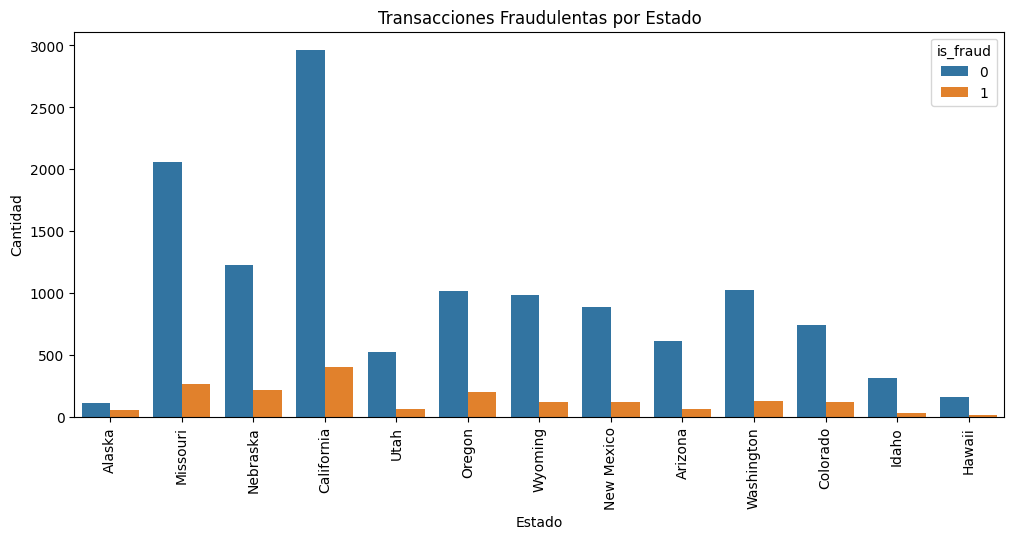

In [ ]:
# Distribución de Fraude por Estado
plt.figure(figsize=(12,5))
sns.countplot(x='state', hue='is_fraud', data=df)
plt.title('Transacciones Fraudulentas por Estado')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

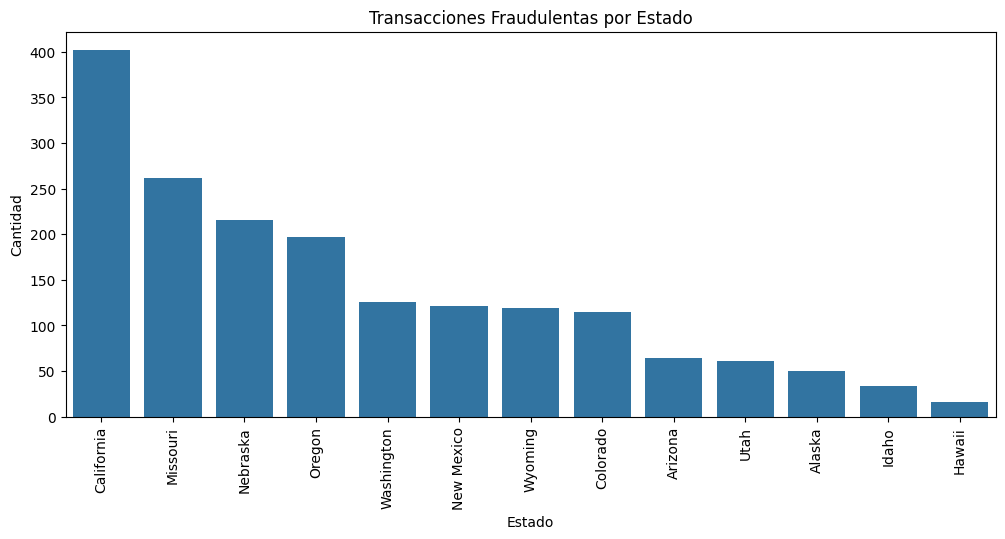

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupa las transacciones por estado y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_state = df.groupby('state')['is_fraud'].sum().sort_values(ascending=False)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 5))
sns.barplot(x=fraud_counts_by_state.index, y=fraud_counts_by_state.values)
plt.title('Transacciones Fraudulentas por Estado')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
# Filtrando transaciones fraudulentas, agrupados por estado
frauds_by_state = df[df['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_count')
# Agrupando datos
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(frauds_by_state, on='state', how='left')
# Mostrando
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df


,state,total_transactions,fraud_count
2,California,3366,402
6,Missouri,2324,262
7,Nebraska,1438,216
9,Oregon,1211,197
11,Washington,1150,126
8,New Mexico,1003,121
12,Wyoming,1100,119
3,Colorado,856,115
1,Arizona,673,64
10,Utah,585,61


In [ ]:
# Filtrando transaciones no fraudulentas, agrupados por estado
no_frauds_by_state = df[df['is_fraud'] == 0].groupby('state').size().reset_index(name='no_fraud_count')
# Agrupando datos
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(no_frauds_by_state, on='state', how='left')
# Mostrando
merged_df.sort_values(by='no_fraud_count', ascending=False, inplace=True)
merged_df

,state,total_transactions,no_fraud_count
2,California,3366,2964
6,Missouri,2324,2062
7,Nebraska,1438,1222
11,Washington,1150,1024
9,Oregon,1211,1014
12,Wyoming,1100,981
8,New Mexico,1003,882
3,Colorado,856,741
1,Arizona,673,609
10,Utah,585,524


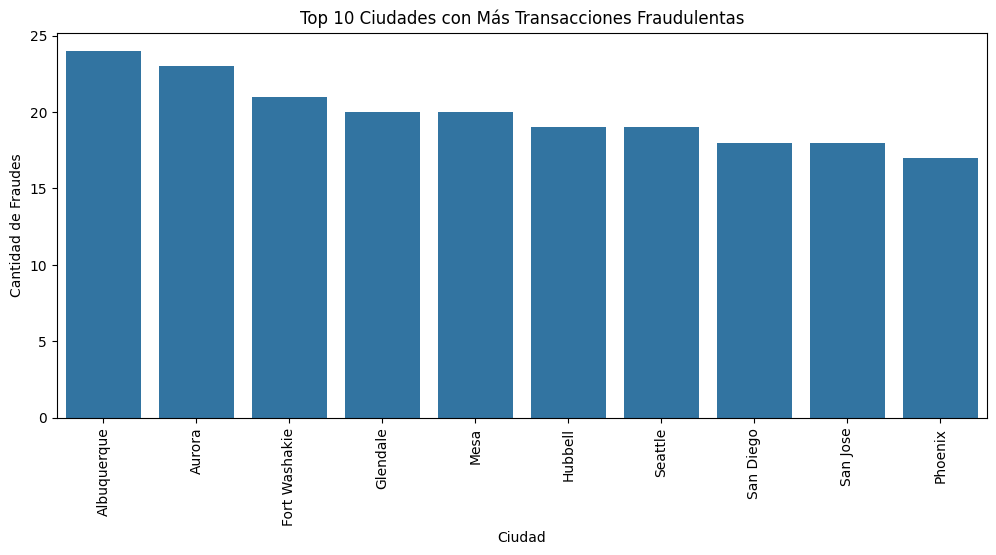

In [ ]:
import matplotlib.pyplot as plt
# Agrupa las transacciones por ciudad y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)

# Selecciona las 10 ciudades con más fraude
top_10_fraud_cities = fraud_counts_by_city.head(10)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_fraud_cities.index, y=top_10_fraud_cities.values)
plt.title('Top 10 Ciudades con Más Transacciones Fraudulentas')
plt.xticks(rotation=90)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Fraudes')
plt.show()


In [ ]:
# Filtrando transacciones fraudulentas por ciudad
fraud_counts_by_city = df[df['is_fraud'] == 1].groupby('city').size().reset_index(name='fraud_count')
# Agrupado datos
merged_df = df.groupby('city').size().reset_index(name='total_transactions').merge(fraud_counts_by_city, on='city', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df.head(10)

,city,total_transactions,fraud_count
0,Albuquerque,81,24.0
9,Aurora,47,23.0
45,Fort Washakie,187,21.0
49,Glendale,150,20.0
101,Mesa,120,20.0
60,Hubbell,19,19.0
145,Seattle,19,19.0
141,San Diego,148,18.0
142,San Jose,139,18.0
124,Phoenix,297,17.0


In [ ]:
# Filtrando transacciones No fraudulentas por ciudad
no_fraud_counts_by_city = df[df['is_fraud'] == 0].groupby('city').size().reset_index(name='no_fraud_count')
# Agrupando datos
merged_df = df.groupby('city').size().reset_index(name='total_transactions').merge(no_fraud_counts_by_city, on='city', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='no_fraud_count', ascending=False, inplace=True)
merged_df.head(10)

,city,total_transactions,no_fraud_count
124,Phoenix,297,280.0
28,Centerview,197,186.0
116,Orient,192,185.0
154,Superior,183,176.0
155,Sutherland,187,172.0
110,Newhall,169,166.0
45,Fort Washakie,187,166.0
100,Meridian,165,160.0
85,Littleton,161,159.0
153,Sun City,161,157.0


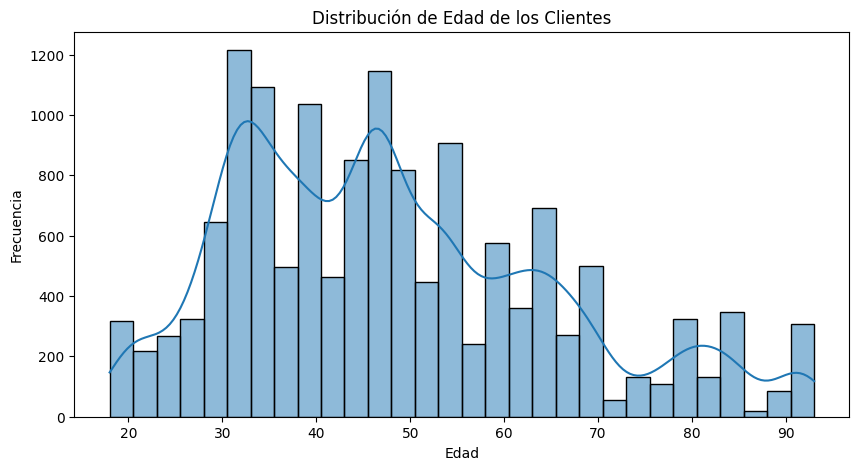

In [ ]:
# Histograma de la distribución de edades
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

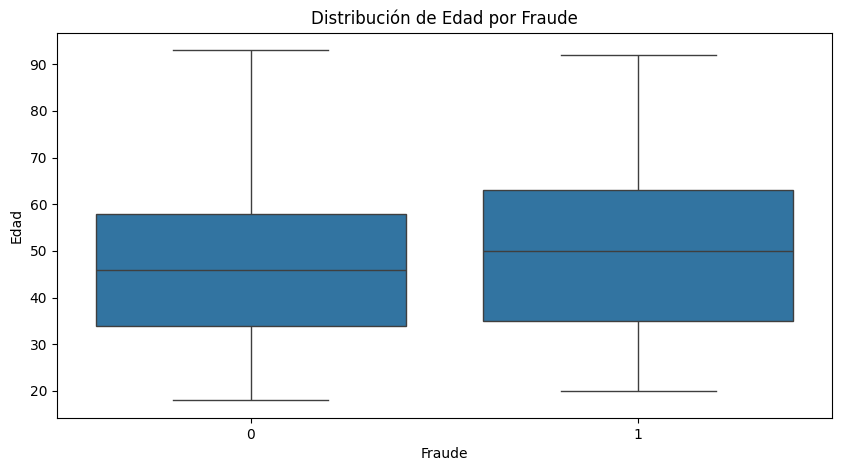

In [ ]:
# Boxplot de la edad por fraude
plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Distribución de Edad por Fraude')
plt.xlabel('Fraude')
plt.ylabel('Edad')
plt.show()

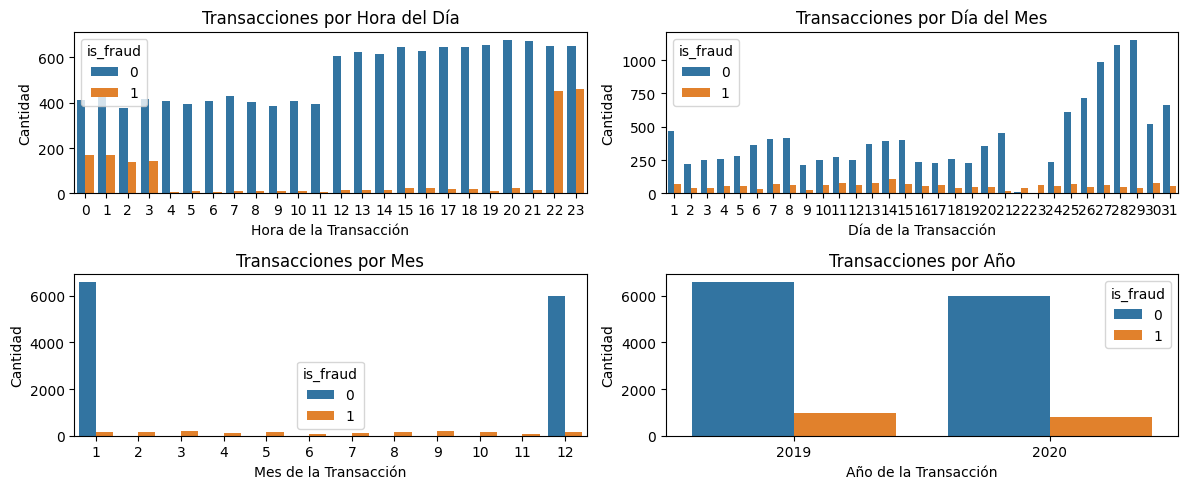

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subplots para cada variable de tiempo
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))

# Gráfico para 'transaction_hour'
sns.countplot(x='transaction_hour', hue='is_fraud', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Transacciones por Hora del Día')
axes[0, 0].set_xlabel('Hora de la Transacción')
axes[0, 0].set_ylabel('Cantidad')

# Gráfico para 'transaction_day'
sns.countplot(x='transaction_day', hue='is_fraud', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Transacciones por Día del Mes')
axes[0, 1].set_xlabel('Día de la Transacción')
axes[0, 1].set_ylabel('Cantidad')

# Gráfico para 'transaction_month'
sns.countplot(x='transaction_month', hue='is_fraud', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Transacciones por Mes')
axes[1, 0].set_xlabel('Mes de la Transacción')
axes[1, 0].set_ylabel('Cantidad')

# Gráfico para 'transaction_year'
sns.countplot(x='transaction_year', hue='is_fraud', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Transacciones por Año')
axes[1, 1].set_xlabel('Año de la Transacción')
axes[1, 1].set_ylabel('Cantidad')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
import plotly.express as px
fraud_by_day_name = (pd.to_datetime(df['trans_date']).dt.day_name().value_counts().sort_values(ascending=False).reset_index().rename(columns={'trans_date': 'day' , 'count': 'fraud_count'}))

fig = px.bar(fraud_by_day_name, x='day' , y='fraud_count',hover_data=['day' , 'fraud_count'], color='day',
       labels={'fraud_count': 'Número de Fraudes', 'day': 'Día de la Semana'}, title='Número de Fraudes por Día de Semana', height=600, width=600)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


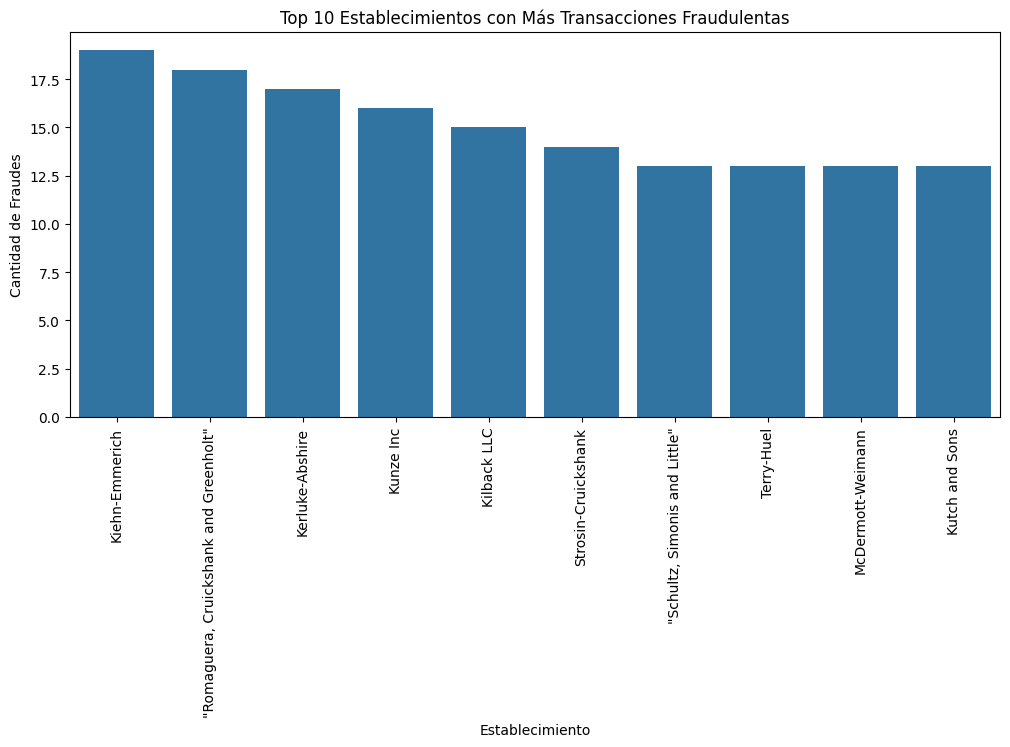

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupa las transacciones por establecimiento y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_merchant = df.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)

# Selecciona los 10 establecimientos con más fraude
top_10_fraud_merchants = fraud_counts_by_merchant.head(10)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_fraud_merchants.index, y=top_10_fraud_merchants.values)
plt.title('Top 10 Establecimientos con Más Transacciones Fraudulentas')
plt.xticks(rotation=90)
plt.xlabel('Establecimiento')
plt.ylabel('Cantidad de Fraudes')
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

maps = df[df['is_fraud'] == 1][['city', 'lat', 'long']].drop_duplicates().sort_values('city').reset_index(drop=True)
counts = df[df['is_fraud'] == 1]['city'].value_counts().rename_axis('city').reset_index(name='count')
maps = maps.merge(counts , on='city' , how='left').sort_values('count')

fig = px.density_mapbox(
    maps, lat='lat', lon='long', z='count',
    color_continuous_scale='Plasma', radius=10,
    title='Mapa de Densidad por Fraude en Ciudades',
    center={"lat": 39.8283, "lon": -93}, zoom=3,
    mapbox_style="open-street-map", hover_name='city',
    height=500, width=1000
)

fig.show()

In [ ]:
df['job'].unique()

array(['"Administrator, education"', 'Cytogeneticist',
       '"Solicitor, Scotland"', 'Science writer', 'Product designer',
       '"Surveyor, minerals"', 'Marketing executive', 'Comptroller',
       'Electronics engineer', 'Clinical cytogeneticist',
       '"Engineer, site"', 'Armed forces training and education officer',
       'Tourist information centre manager',
       '"Administrator, local government"', 'Systems analyst',
       'Charity officer', 'Public relations account executive',
       'Set designer', 'Information systems manager',
       'Occupational hygienist', 'Counsellor', 'Land/geomatics surveyor',
       'Landscape architect', '"Buyer, industrial"',
       'Research scientist (physical sciences)', 'Airline pilot',
       'Careers information officer', '"Pilot, airline"',
       'Industrial/product designer', '"Nurse, mental health"',
       'Health physicist', '"Scientist, audiological"',
       'Health service manager', '"Scientist, physiological"',
       'Cartog

In [ ]:
# Definimos grupos de profesiones
def classify_profession(profession):
    profession_lower = profession.lower()
    if any(keyword in profession_lower for keyword in ['engineer', 'scientist', 'technologist', 'technologist']):
        return 'Ingeniería y Técnicos'
    elif any(keyword in profession_lower for keyword in ['nurse', 'therapist', 'psychologist']):
        return 'Salud'
    elif any(keyword in profession_lower for keyword in ['teacher', 'lecturer', 'educator']):
        return 'Educación'
    elif any(keyword in profession_lower for keyword in ['manager', 'executive', 'officer', 'consultant']):
        return 'Ejecutivos'
    elif any(keyword in profession_lower for keyword in ['artist', 'designer', 'writer', 'musician']):
        return 'Arte'
    elif any(keyword in profession_lower for keyword in ['administrator', 'accountant', 'officer']):
        return 'Administradores'
    #elif any(keyword in profession_lower for keyword in ['doctor', 'physician', 'dentist', 'surgeon']):
        #return 'Médicos
    else:
        return 'Other'

# Aplicando la función a la cplumna 'job'
df['profession_group'] = df['job'].apply(classify_profession)

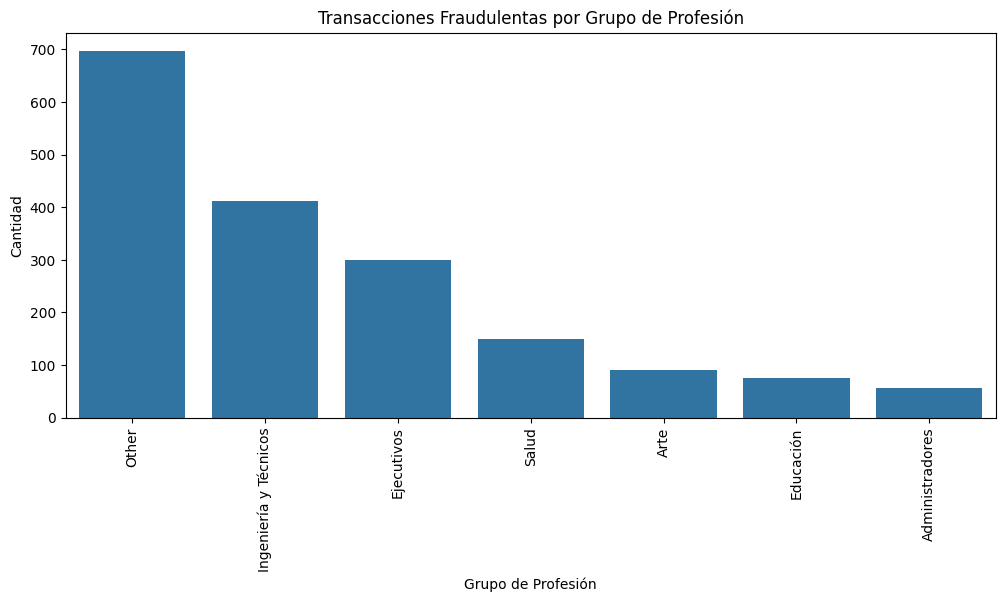

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa las transacciones por profession_group y calcula la cantidad de transacciones fraudulentas
profession_fraud_counts = df.groupby('profession_group')['is_fraud'].sum().sort_values(ascending=False)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 5))
sns.barplot(x=profession_fraud_counts.index, y=profession_fraud_counts.values)
plt.title('Transacciones Fraudulentas por Grupo de Profesión')
plt.xticks(rotation=90)
plt.xlabel('Grupo de Profesión')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
df['profession_group'].value_counts()

,count
profession_group,
Other,6064
Ingeniería y Técnicos,2989
Ejecutivos,2498
Salud,1314
Educación,596
Arte,589
Administradores,333


In [ ]:
# columnas de df
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'age',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [ ]:
# Columnas categóricas de df
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['merchant', 'category', 'city', 'state', 'job', 'trans_num',
       'trans_date', 'trans_time', 'profession_group'],
      dtype='object')


In [ ]:
# Columnas numéricas de df
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week'],
      dtype='object')


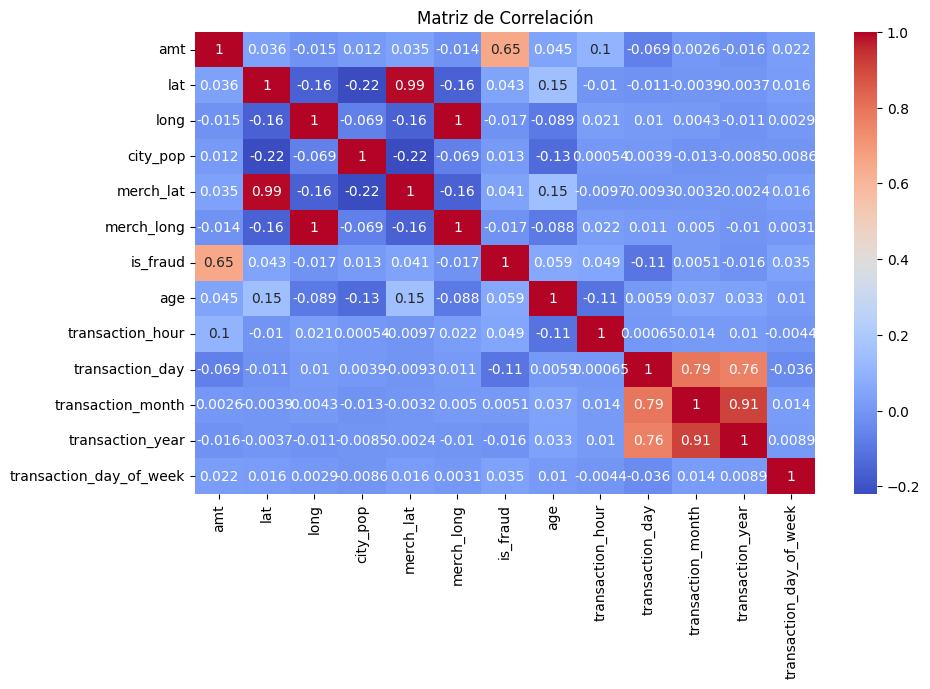

In [ ]:
# Mapa de Calor - Pearson
plt.figure(figsize=(10,6))
sns.heatmap(df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

lat, merch_lat : altamente correlacionadas

long, merch_long : altamente correlacionadas

In [ ]:
# Estadística df
df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,transaction_hour,transaction_day,transaction_month,transaction_year,transaction_day_of_week
count,14383,14383.000000,14383.000000,14383.000000,1.438300e+04,14383.000000,14383.000000,14383.000000,14383.000000,14383.000000,14383.000000,14383.000000,14383.000000,14383.000000
mean,2019-12-17 13:46:12.614892544,122.719068,39.761571,-110.835395,1.063921e+05,39.761755,-110.836186,0.123896,48.066954,13.026351,18.656261,6.246889,2019.472989,2.821873
min,2019-01-01 00:00:00,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685,0.000000,18.000000,0.000000,1.000000,1.000000,2019.000000,0.000000
25%,2019-01-12 17:05:30,11.945000,36.715400,-120.282400,4.930000e+02,36.768908,-120.095775,0.000000,34.000000,7.000000,10.000000,1.000000,2019.000000,1.000000
50%,2019-08-20 02:10:00,51.290000,39.666200,-111.098500,1.645000e+03,39.613766,-111.203646,0.000000,46.000000,14.000000,20.000000,4.000000,2019.000000,3.000000
75%,2020-12-27 21:12:30,100.140000,41.940400,-101.136000,3.543900e+04,42.275391,-100.556920,0.000000,59.000000,20.000000,28.000000,12.000000,2020.000000,5.000000
max,2020-12-31 23:59:00,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366,1.000000,93.000000,23.000000,31.000000,12.000000,2020.000000,6.000000
std,NaN,228.879064,5.266532,12.877931,2.900439e+05,5.309190,12.887765,0.329475,17.171371,7.278883,9.561527,5.285759,0.499287,2.139965


# Transformación de Datos

In [ ]:
# Respaldo de df
df_backup = df.copy()

In [ ]:
# df = df_backup.copy()

In [ ]:
# columnas de df
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'age',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [ ]:
df.head().T

,0,1,2,3,4
trans_date_trans_time,2019-01-04 00:58:00,2019-01-04 15:06:00,2019-01-04 22:37:00,2019-01-04 23:06:00,2019-01-04 23:59:00
merchant,"""Stokes, Christiansen and Sipes""",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
job,"""Administrator, education""","""Administrator, education""","""Administrator, education""","""Administrator, education""","""Administrator, education"""


In [ ]:
# Elimina columnas porque es del dueño de la tarjeta
"""df = df.drop(columns=['trans_date_trans_time', 'state','city', 'lat', 'long', 'job', 'trans_num', 'merch_lat',
       """'merch_long', 'trans_date', 'trans_time','transaction_day_of_week','transaction_year'])

In [ ]:
# Elimina columnas porque es del dueño de la tarjeta
df = df.drop(columns=['trans_date_trans_time','job','trans_num', 'trans_date','trans_time' ])

In [ ]:
df.head().T

,0,1,2,3,4
merchant,"""Stokes, Christiansen and Sipes""",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
merch_lat,65.654142,65.468863,65.347667,64.445035,65.447094
merch_long,-164.722603,-165.473127,-165.914542,-166.080207,-165.446843


In [ ]:
# columnas de df
print(df.columns)

Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [ ]:
# valores unicos de columna 'merchant'
unique_merchants = df['merchant'].unique()
print(unique_merchants)

['"Stokes, Christiansen and Sipes"' 'Predovic Inc' 'Wisozk and Sons'
 'Murray-Smitham' 'Friesen Lt' '"Raynor, Reinger and Hagenes"'
 'Heller-Langosh' 'Padberg-Welch' 'McGlynn-Heathcote' 'Dooley-Thompson'
 '"Gottlieb, Considine and Schultz"' '"Moen, Reinger and Murphy"'
 '"Hauck, Dietrich and Funk"' 'Pouros-Haag' 'Goyette Inc'
 '"Baumbach, Strosin and Nicolas"' "Pacocha-O'Reilly" 'Barrows PLC'
 'Fisher-Schowalte' 'Gleason-Macejkovic' 'Kutch LLC' 'Kihn Inc'
 'Kris-Weimann' '"Kihn, Abernathy and Douglas"' 'Kiehn-Emmerich'
 '"Osinski, Ledner and Leuschke"' 'Vandervort-Funk' 'Terry-Huel'
 'Volkman-Predovic' '"Roob, Conn and Tremblay"'
 '"Tillman, Fritsch and Schmitt"' 'Larson-Moen' 'Kutch and Sons'
 '"Parisian, Schiller and Altenwerth"' 'Kozey-Boehm' 'Rau and Sons'
 'Parisian and Sons' "O'Keefe-Hudson" 'Cassin-Harvey'
 '"Schumm, Bauch and Ondrick"' '"Towne, Walker and Bore"' 'Kling-Grant'
 '"Jenkins, Hauck and Friesen"' '"Baumbach, Hodkiewicz and Walsh"'
 'Beier-Hyatt' '"Reichert, Huels and

In [ ]:
# cuenta valores unicos de 'merchant'
unique_merchant_count = df['merchant'].nunique()
print(f"Número de valores únicos en la columna 'merchant': {unique_merchant_count}")

Número de valores únicos en la columna 'merchant': 693


In [ ]:
# cuenta valores unicos de 'merchant'  tomando en cuenta 'is_fraud'==1
fraud_merchant_counts = df[df['is_fraud'] == 1]['merchant'].nunique()
print(f"Número de comerciantes únicos con transacciones fraudulentas: {fraud_merchant_counts}")

Número de comerciantes únicos con transacciones fraudulentas: 509


In [ ]:
# Filtrando transaciones fraudulentas, por 'merchant'
frauds_by_merchant = df[df['is_fraud'] == 1].groupby('merchant').size().reset_index(name='fraud_count')
# Agrupando los datos
merged_df = df.groupby('merchant').size().reset_index(name='total_transactions').merge(frauds_by_merchant, on='merchant', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df.head(5)

,merchant,total_transactions,fraud_count
445,Kiehn-Emmerich,41,19.0
155,"""Romaguera, Cruickshank and Greenholt""",37,18.0
440,Kerluke-Abshire,34,17.0
477,Kunze Inc,31,16.0
450,Kilback LLC,58,15.0


In [ ]:
df_resp = df.copy()

In [ ]:
# df = df_resp.copy()

In [ ]:
# Función para estandarizar el texto
def standardize_text(text):
    # Eliminar espacios en blanco a los extremos
    text = text.strip()
    # Eliminar dobles comillas al principio y al final
    if text.startswith('"'):
        text = text[1:]
    if text.endswith('"'):
        text = text[:-1]
    return text.strip()  # Retornar el texto estandarizado

In [ ]:
# Aplicar la función a la columna merchant
df['merchant'] = df['merchant'].apply(standardize_text)

In [ ]:
df['merchant']

,merchant
0,"Stokes, Christiansen and Sipes"
1,Predovic Inc
2,Wisozk and Sons
3,Murray-Smitham
4,Friesen Lt
...,...
14441,Hudson-Grady
14442,"Nienow, Ankunding and Collie"
14443,Pacocha-O'Reilly
14444,"Bins, Balistreri and Beatty"


In [ ]:
# Calcular el total de fraudes y el total de transacciones por local
fraud_counts = df.groupby('merchant').agg(
    total_frauds=('is_fraud', 'sum'),
    total_transactions=('is_fraud', 'count')
).reset_index()

# Calcular el porcentaje de fraude
fraud_counts['porcent_fraud'] = (fraud_counts['total_frauds'] / fraud_counts['total_transactions']) * 100


In [ ]:
fraud_counts = fraud_counts.sort_values(by='total_frauds', ascending=False)

# Mostrar el resultado
print(fraud_counts)

                                 merchant  total_frauds  total_transactions  \
309                        Kiehn-Emmerich            19                  41   
528  Romaguera, Cruickshank and Greenholt            18                  37   
304                       Kerluke-Abshire            17                  34   
352                             Kunze Inc            16                  31   
316                           Kilback LLC            15                  58   
..                                    ...           ...                 ...   
133                      Dibbert and Sons             0                  28   
132         Denesik, Powlowski and Pouros             0                  25   
500                           Reichel LLC             0                  17   
501             Reichel, Bradtke and Blan             0                   8   
490         Prosacco, Kreiger and Kovacek             0                  19   

     porcent_fraud  
309      46.341463  
528      

In [ ]:
# Contar los fraudes por establecimiento
fraud_counts.rename(columns={'total_frauds': 'fraud_count'}, inplace=True)
fraud_counts

,merchant,fraud_count,total_transactions,porcent_fraud
309,Kiehn-Emmerich,19,41,46.341463
528,"Romaguera, Cruickshank and Greenholt",18,37,48.648649
304,Kerluke-Abshire,17,34,50.000000
352,Kunze Inc,16,31,51.612903
316,Kilback LLC,15,58,25.862069
...,...,...,...,...
133,Dibbert and Sons,0,28,0.000000
132,"Denesik, Powlowski and Pouros",0,25,0.000000
500,Reichel LLC,0,17,0.000000
501,"Reichel, Bradtke and Blan",0,8,0.000000


In [ ]:
total_frauds = df['is_fraud'].sum()
total_frauds

1782

In [ ]:
# Unir los conteos con el DataFrame original
df = df.merge(fraud_counts, on='merchant', how='left')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


In [ ]:
df.head(5)

,merchant,category,amt,city,state,lat,long,city_pop,merch_lat,merch_long,...,age,transaction_hour,transaction_day,transaction_month,transaction_year,transaction_day_of_week,profession_group,fraud_count,total_transactions,porcent_fraud
0,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,Alaska,64.7556,-165.6723,145,65.654142,-164.722603,...,80,0,4,1,2019,4,Administradores,1,10,10.000000
1,Predovic Inc,shopping_net,966.11,Wales,Alaska,64.7556,-165.6723,145,65.468863,-165.473127,...,80,15,4,1,2019,4,Administradores,7,24,29.166667
2,Wisozk and Sons,misc_pos,49.61,Wales,Alaska,64.7556,-165.6723,145,65.347667,-165.914542,...,80,22,4,1,2019,4,Administradores,2,14,14.285714
3,Murray-Smitham,grocery_pos,295.26,Wales,Alaska,64.7556,-165.6723,145,64.445035,-166.080207,...,80,23,4,1,2019,4,Administradores,13,38,34.210526
4,Friesen Lt,health_fitness,18.17,Wales,Alaska,64.7556,-165.6723,145,65.447094,-165.446843,...,80,23,4,1,2019,4,Administradores,4,26,15.384615


<Axes: >

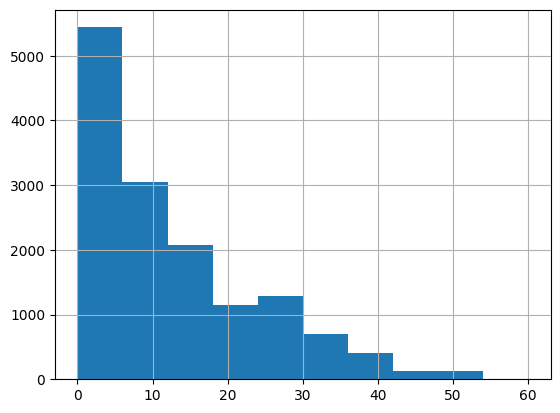

In [ ]:
df['porcent_fraud'].hist()

In [ ]:
# Calcular los percentiles para dividir en 5 clases
percentiles = df['porcent_fraud'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
percentiles

array([ 0.        ,  0.        ,  6.66666667, 12.12121212, 22.22222222,
       60.        ])

In [ ]:
# Crear la nueva columna fraud_category_merchant
def categorize_fraud(row):
    if row['porcent_fraud'] == 0:
        return 0
    elif row['porcent_fraud'] <= percentiles[1]:  # Entre 0 y el 20vo percentil
        return 1
    elif row['porcent_fraud'] <= percentiles[2]:  # Entre el 20vo y el 40vo percentil
        return 2
    elif row['porcent_fraud'] <= percentiles[3]:  # Entre el 40vo y el 60vo percentil
        return 3
    elif row['porcent_fraud'] <= percentiles[4]:  # Entre el 60vo y el 80vo percentil
        return 4
    else:  # Por encima del 80vo percentil
        return 5

In [ ]:
percentiles[0]

0.0

In [ ]:
percentiles[1]

0.0

In [ ]:
percentiles[2]

6.666666666666667

In [ ]:
percentiles[3]

12.121212121212121

In [ ]:
percentiles[4]

22.22222222222222

In [ ]:
# Aplicar la función para crear la nueva columna
df['fraud_category_merchant'] = df.apply(categorize_fraud, axis=1)

In [ ]:
# Mostrar el resultado final
df.head().T

,0,1,2,3,4
merchant,"Stokes, Christiansen and Sipes",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
merch_lat,65.654142,65.468863,65.347667,64.445035,65.447094
merch_long,-164.722603,-165.473127,-165.914542,-166.080207,-165.446843


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


In [ ]:
df[df['merchant'] == "Kiehn-Emmerich"]

,merchant,category,amt,city,state,lat,long,city_pop,merch_lat,merch_long,...,transaction_hour,transaction_day,transaction_month,transaction_year,transaction_day_of_week,profession_group,fraud_count,total_transactions,porcent_fraud,fraud_category_merchant
24,Kiehn-Emmerich,grocery_pos,320.60,Ravenna,Nebraska,41.0233,-98.9041,2202,41.867565,-99.096279,...,0,13,1,2019,6,Other,19,41,46.341463,5
117,Kiehn-Emmerich,grocery_pos,257.47,La Grande,Oregon,45.3304,-118.0852,16955,44.575710,-117.809870,...,7,8,2,2019,4,Ingeniería y Técnicos,19,41,46.341463,5
173,Kiehn-Emmerich,grocery_pos,285.81,Hubbell,Nebraska,40.0456,-97.4735,121,40.990782,-97.605382,...,3,25,2,2019,0,Arte,19,41,46.341463,5
223,Kiehn-Emmerich,grocery_pos,305.28,Mesa,Arizona,33.4317,-111.8469,478404,32.540641,-112.713779,...,14,14,3,2019,3,Other,19,41,46.341463,5
260,Kiehn-Emmerich,grocery_pos,348.72,Napa,California,38.4549,-122.2564,94014,38.029749,-122.067051,...,9,17,3,2019,6,Other,19,41,46.341463,5
263,Kiehn-Emmerich,grocery_pos,282.17,Kaktovik,Alaska,66.6933,-153.9940,239,67.397018,-154.118108,...,1,22,3,2019,4,Ejecutivos,19,41,46.341463,5
288,Kiehn-Emmerich,grocery_pos,315.55,Aurora,Colorado,39.7656,-104.7069,389246,39.355490,-104.188137,...,3,25,3,2019,0,Arte,19,41,46.341463,5
364,Kiehn-Emmerich,grocery_pos,313.33,Blairsden-Graeagle,California,39.8127,-120.6405,1725,39.384000,-119.960675,...,2,30,4,2019,1,Ejecutivos,19,41,46.341463,5
408,Kiehn-Emmerich,grocery_pos,343.27,Campbell,Nebraska,40.2967,-98.7370,493,40.863615,-99.383553,...,22,17,5,2019,4,Other,19,41,46.341463,5
468,Kiehn-Emmerich,grocery_pos,298.99,San Jose,California,37.3304,-121.7913,973849,36.968997,-121.720965,...,3,14,6,2019,4,Ingeniería y Técnicos,19,41,46.341463,5


In [ ]:
# Verificar si la columna 'fraud_category_merchant' tiene valores nulos
null_count = df['fraud_category_merchant'].isnull().sum()

if null_count > 0:
  print(f"La columna 'fraud_category_merchant' tiene {null_count} valores nulos.")
else:
  print("La columna 'fraud_category_merchant' no tiene valores nulos.")


La columna 'fraud_category_merchant' no tiene valores nulos.


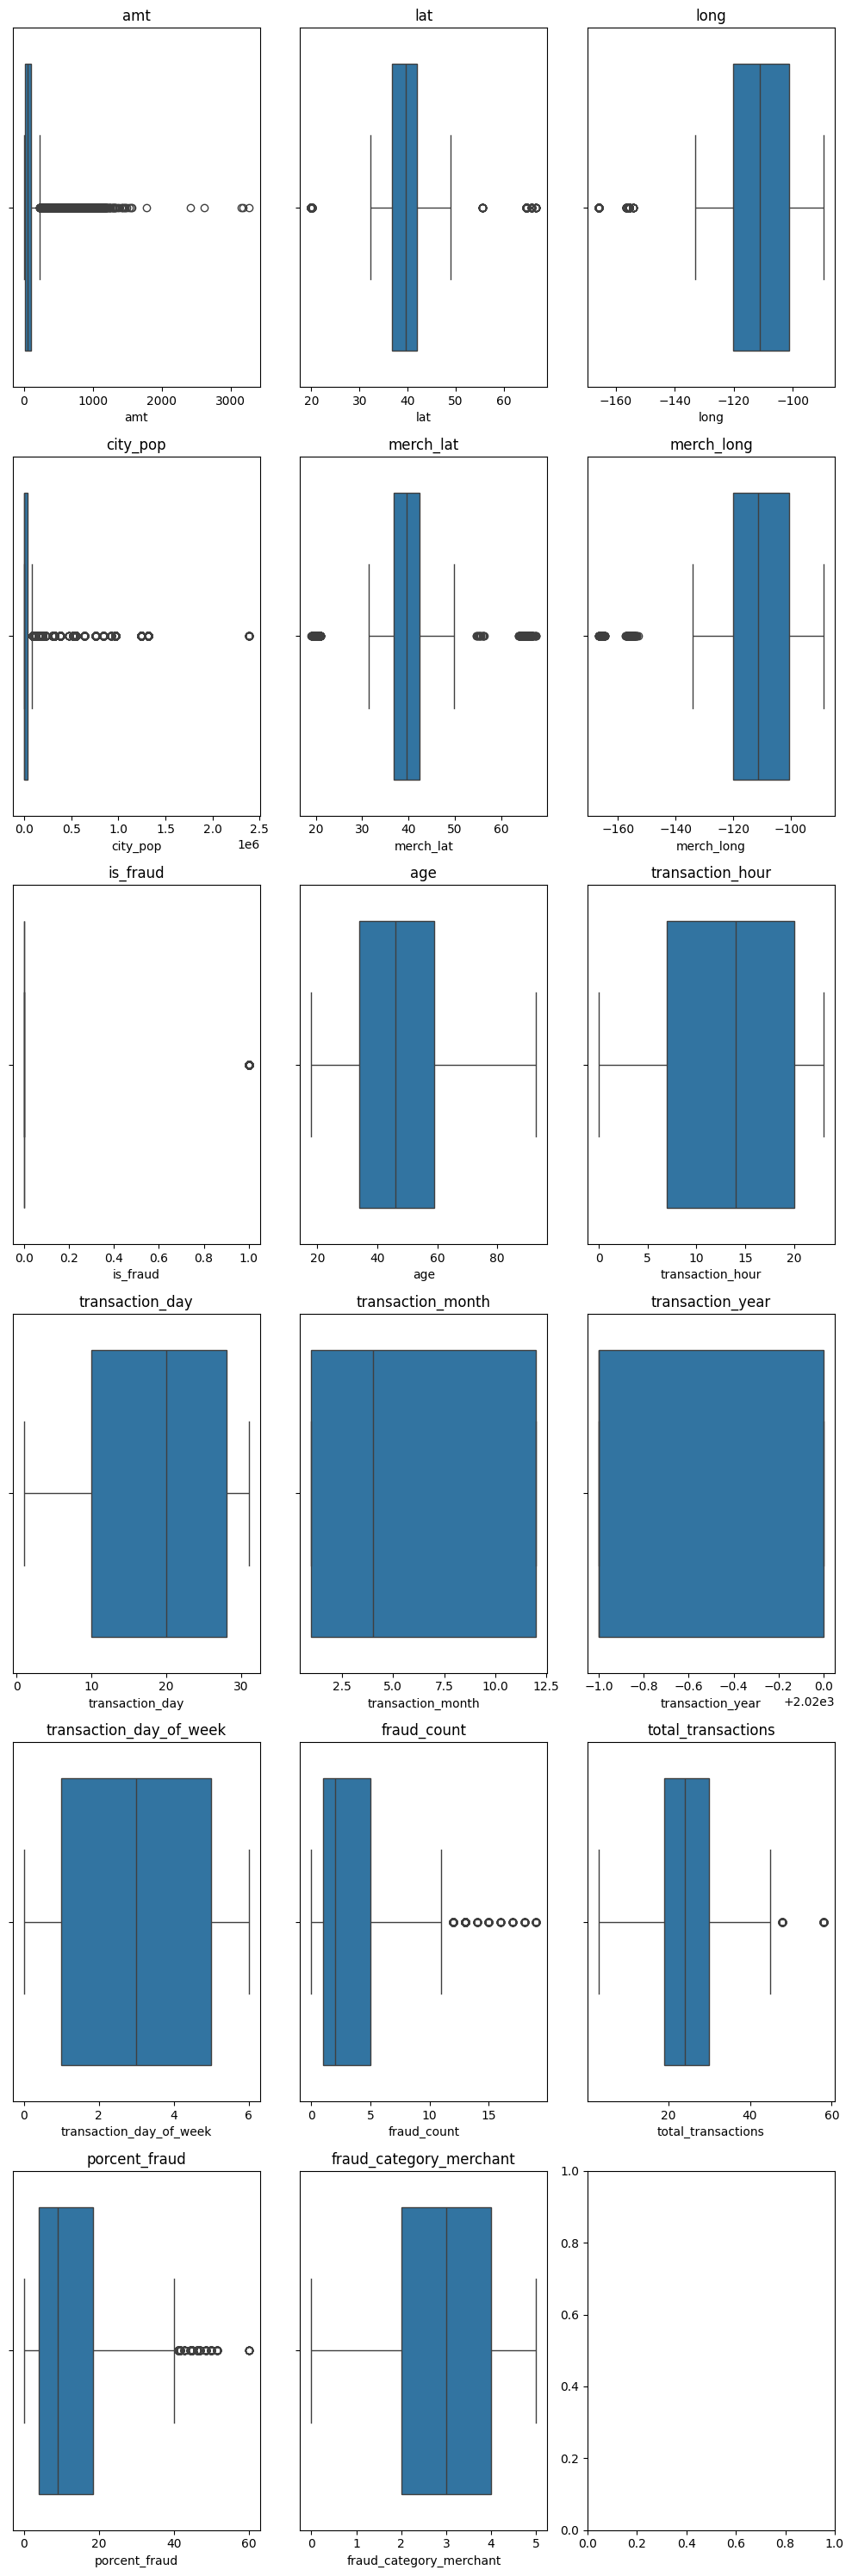

In [ ]:
# Crea subplots para cada columna numérica
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = (num_cols + 2) // 3  # Calcula el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 5 * num_rows))

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    row = i // 3
    col_num = i % 3
    sns.boxplot(x=df[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()


In [ ]:
# columnas de df
print(df.columns)

Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group',
       'fraud_count', 'total_transactions', 'porcent_fraud',
       'fraud_category_merchant'],
      dtype='object')


In [ ]:
# Eliminando
df = df.drop(columns=['merchant','fraud_count','total_transactions','porcent_fraud'])

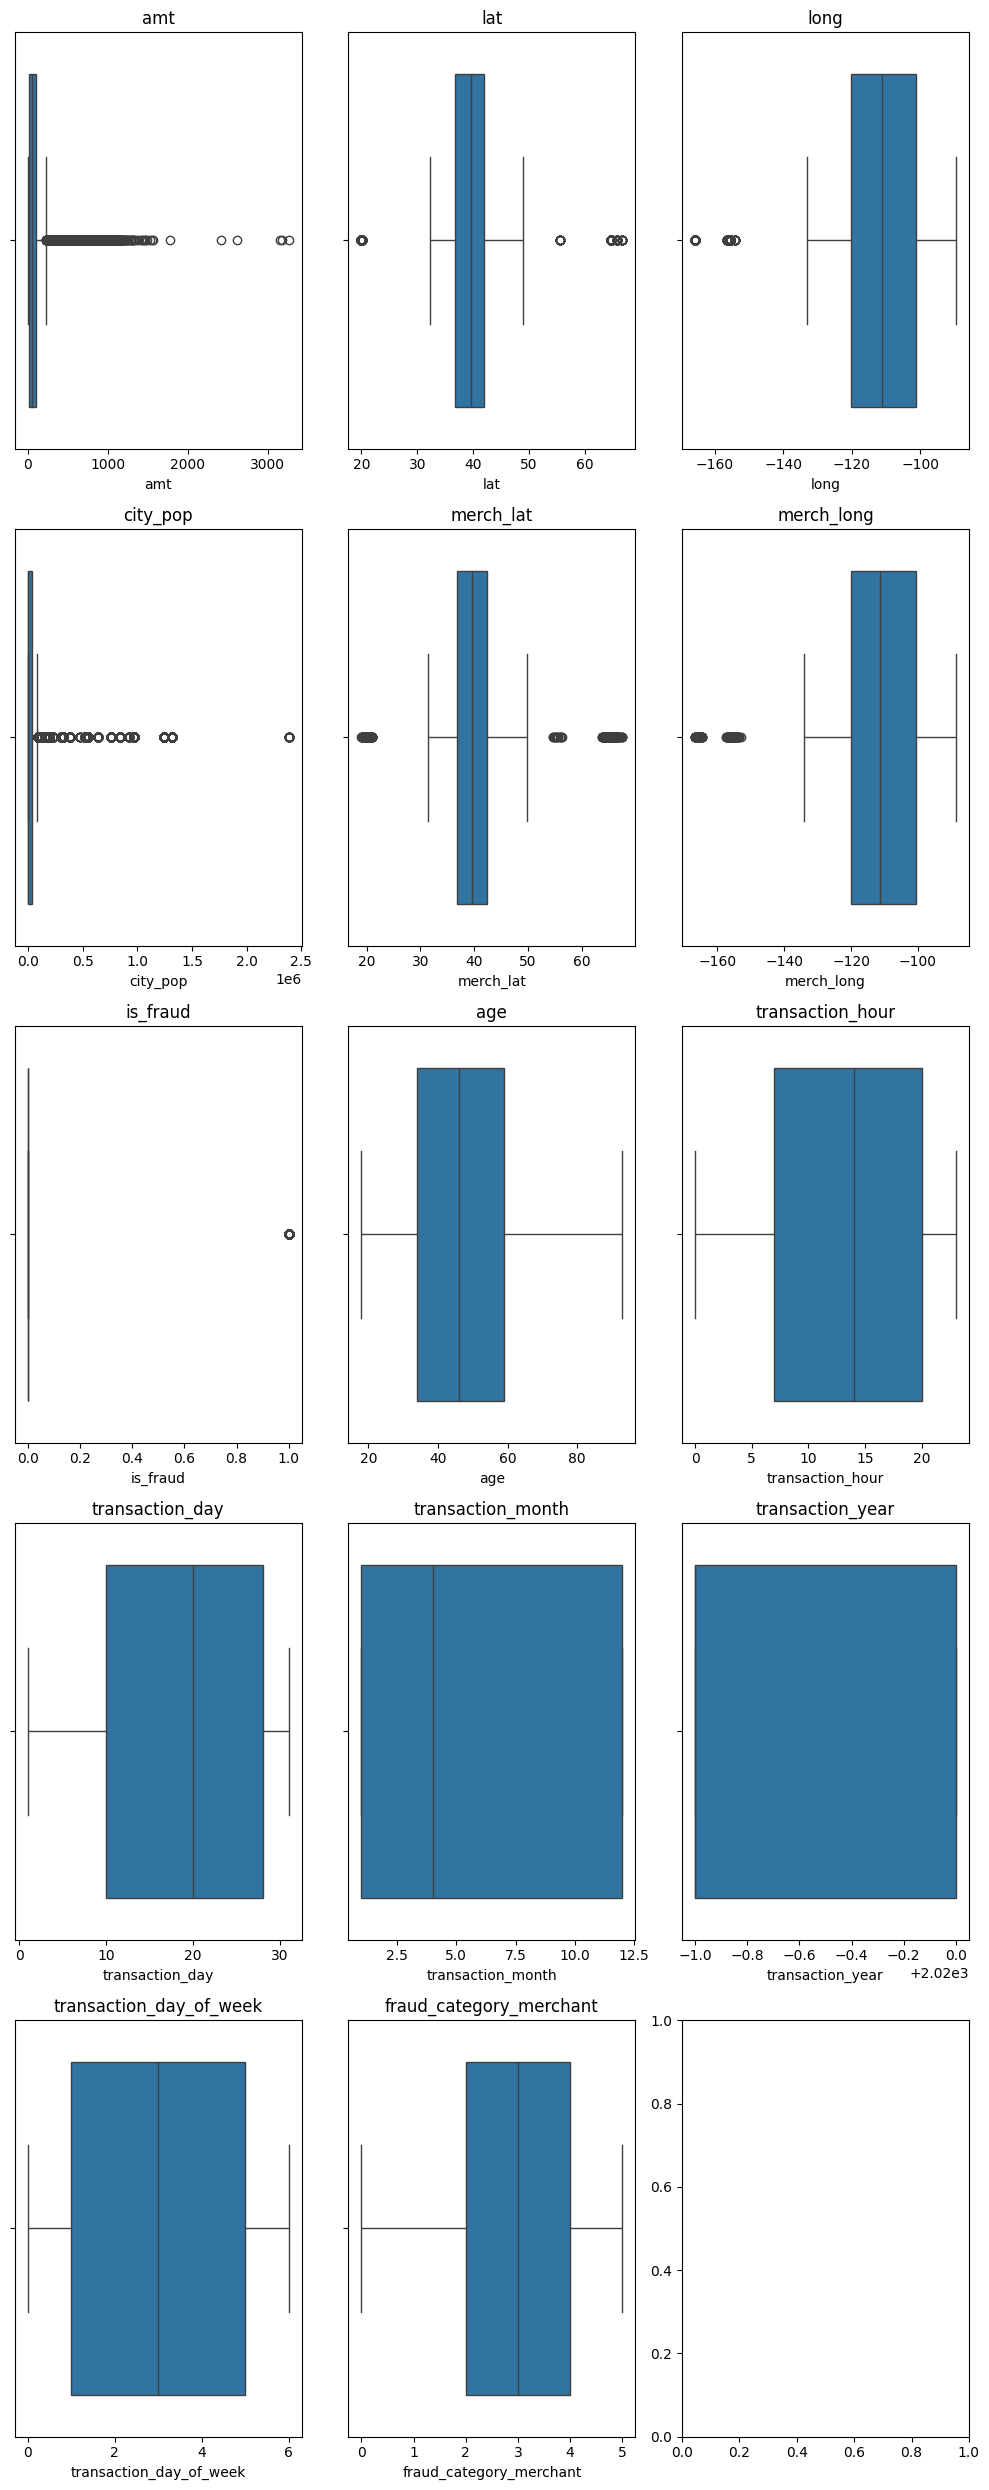

In [ ]:
# Crea subplots para cada columna numérica
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = (num_cols + 2) // 3  # Calcula el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 5 * num_rows))

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    row = i // 3
    col_num = i % 3
    sns.boxplot(x=df[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [ ]:
# columnas de df
print(df.columns)

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14383 entries, 0 to 14382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 14383 non-null  object 
 1   amt                      14383 non-null  float64
 2   city                     14383 non-null  object 
 3   state                    14383 non-null  object 
 4   lat                      14383 non-null  float64
 5   long                     14383 non-null  float64
 6   city_pop                 14383 non-null  int64  
 7   merch_lat                14383 non-null  float64
 8   merch_long               14383 non-null  float64
 9   is_fraud                 14383 non-null  int64  
 10  age                      14383 non-null  int64  
 11  transaction_hour         14383 non-null  int32  
 12  transaction_day          14383 non-null  int32  
 13  transaction_month        14383 non-null  int32  
 14  transaction_year      

In [ ]:
# Aplica One-Hot Encoding a las columnas 'category' y 'profession_group'
df = pd.get_dummies(df, columns=['category', 'profession_group','fraud_category_merchant'], prefix=['category', 'profession','fraud_category_merchant'])

In [ ]:
df.head(5)

,amt,city_pop,is_fraud,age,transaction_hour,transaction_day,transaction_month,category_entertainment,category_food_dining,category_gas_transport,...,profession_Educación,profession_Ejecutivos,profession_Ingeniería y Técnicos,profession_Other,profession_Salud,fraud_category_merchant_0,fraud_category_merchant_2,fraud_category_merchant_3,fraud_category_merchant_4,fraud_category_merchant_5
0,14.37,145,1,80,0,4,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,966.11,145,1,80,15,4,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,49.61,145,1,80,22,4,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,295.26,145,1,80,23,4,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,18.17,145,1,80,23,4,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14383 entries, 0 to 14382
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   amt                               14383 non-null  float64
 1   city_pop                          14383 non-null  int64  
 2   is_fraud                          14383 non-null  int64  
 3   age                               14383 non-null  int64  
 4   transaction_hour                  14383 non-null  int32  
 5   transaction_day                   14383 non-null  int32  
 6   transaction_month                 14383 non-null  int32  
 7   category_entertainment            14383 non-null  bool   
 8   category_food_dining              14383 non-null  bool   
 9   category_gas_transport            14383 non-null  bool   
 10  category_grocery_net              14383 non-null  bool   
 11  category_grocery_pos              14383 non-null  bool   
 12  cate

In [ ]:
# columnas de df
print(df.columns)

Index(['amt', 'city_pop', 'is_fraud', 'age', 'transaction_hour',
       'transaction_day', 'transaction_month', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'profession_Administradores', 'profession_Arte', 'profession_Educación',
       'profession_Ejecutivos', 'profession_Ingeniería y Técnicos',
       'profession_Other', 'profession_Salud', 'fraud_category_merchant_0',
       'fraud_category_merchant_2', 'fraud_category_merchant_3',
       'fraud_category_merchant_4', 'fraud_category_merchant_5'],
      dtype='object')


In [ ]:
df_backup2 = df.copy()

In [ ]:
 # df = df_backup2.copy()

# Dividiendo los datos y Manejo de balanceo del train

In [ ]:
# Separa características (X) y variable objetivo (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [ ]:
# X_train, y_train pasados temporalmente a df_train

df_train= pd.DataFrame(X_train)
df_train['is_fraud'] = y_train
df_train.T


,11966,1572,6649,12255,4089,3505,11096,14295,10249,5119,...,4474,237,5173,9336,4407,6260,13140,12577,4493,7334
category,home,shopping_net,misc_net,entertainment,shopping_pos,grocery_net,shopping_net,kids_pets,home,health_fitness,...,gas_transport,grocery_pos,personal_care,gas_transport,grocery_pos,home,gas_transport,health_fitness,gas_transport,gas_transport
amt,15.0,963.73,109.96,10.43,5.71,39.7,1.43,15.83,20.66,23.11,...,64.71,310.03,205.2,43.37,29.98,2.71,69.45,146.9,73.52,74.17
city,Moriarty,Palmdale,Burbank,Eugene,Redford,Arnold,Norwalk,Fields Landing,Parks,Sun City,...,Hatch,Lonetree,High Rolls Mountain Park,Cascade Locks,Moriarty,Grenada,Fullerton,Holstein,Blairsden-Graeagle,Westfir
state,New Mexico,California,Washington,Oregon,Missouri,Missouri,California,California,Arizona,California,...,Utah,Wyoming,New Mexico,Oregon,New Mexico,California,Nebraska,Nebraska,California,Oregon
lat,34.9889,34.5715,46.1966,44.0385,37.3272,38.4305,33.9056,40.7268,35.2563,33.7467,...,37.7175,41.0552,32.9396,45.671,34.9889,41.6125,41.366,40.4542,39.8127,43.7575
long,-106.0609,-118.0231,-118.9017,-123.0614,-91.0243,-90.387,-118.0818,-124.2174,-111.95,-117.1721,...,-112.4777,-110.1603,-105.8189,-121.8686,-106.0609,-122.5258,-98.0054,-98.6538,-120.6405,-122.481
city_pop,7268,171170,3684,191096,241,35439,105549,276,759,54287,...,258,49,899,1288,7268,589,1749,331,1725,597
merch_lat,35.191886,35.525013,45.563869,44.708545,36.85701,38.952935,34.351833,40.207219,36.19785,34.645096,...,38.378825,41.283249,33.706112,46.431635,34.365198,41.614679,41.820034,40.1038,38.997843,42.872349
merch_long,-105.832554,-117.359532,-118.076592,-122.072096,-91.002408,-90.990324,-117.744959,-124.512417,-112.374533,-117.275318,...,-113.33076,-110.290484,-106.560546,-121.839005,-106.585231,-122.834247,-98.629736,-98.835218,-120.525765,-122.733809
age,31,57,39,55,46,35,46,90,62,48,...,59,38,53,83,32,75,46,69,53,59


In [ ]:
# df_train actualiza el nombre de la columna 'transaction_day' al nuevo nombre 'transaction_day_of_month'

df_train = df_train.rename(columns={'transaction_day': 'transaction_day_of_month'})

In [ ]:
df_train.T

,11966,1572,6649,12255,4089,3505,11096,14295,10249,5119,...,4474,237,5173,9336,4407,6260,13140,12577,4493,7334
category,home,shopping_net,misc_net,entertainment,shopping_pos,grocery_net,shopping_net,kids_pets,home,health_fitness,...,gas_transport,grocery_pos,personal_care,gas_transport,grocery_pos,home,gas_transport,health_fitness,gas_transport,gas_transport
amt,15.0,963.73,109.96,10.43,5.71,39.7,1.43,15.83,20.66,23.11,...,64.71,310.03,205.2,43.37,29.98,2.71,69.45,146.9,73.52,74.17
city,Moriarty,Palmdale,Burbank,Eugene,Redford,Arnold,Norwalk,Fields Landing,Parks,Sun City,...,Hatch,Lonetree,High Rolls Mountain Park,Cascade Locks,Moriarty,Grenada,Fullerton,Holstein,Blairsden-Graeagle,Westfir
state,New Mexico,California,Washington,Oregon,Missouri,Missouri,California,California,Arizona,California,...,Utah,Wyoming,New Mexico,Oregon,New Mexico,California,Nebraska,Nebraska,California,Oregon
lat,34.9889,34.5715,46.1966,44.0385,37.3272,38.4305,33.9056,40.7268,35.2563,33.7467,...,37.7175,41.0552,32.9396,45.671,34.9889,41.6125,41.366,40.4542,39.8127,43.7575
long,-106.0609,-118.0231,-118.9017,-123.0614,-91.0243,-90.387,-118.0818,-124.2174,-111.95,-117.1721,...,-112.4777,-110.1603,-105.8189,-121.8686,-106.0609,-122.5258,-98.0054,-98.6538,-120.6405,-122.481
city_pop,7268,171170,3684,191096,241,35439,105549,276,759,54287,...,258,49,899,1288,7268,589,1749,331,1725,597
merch_lat,35.191886,35.525013,45.563869,44.708545,36.85701,38.952935,34.351833,40.207219,36.19785,34.645096,...,38.378825,41.283249,33.706112,46.431635,34.365198,41.614679,41.820034,40.1038,38.997843,42.872349
merch_long,-105.832554,-117.359532,-118.076592,-122.072096,-91.002408,-90.990324,-117.744959,-124.512417,-112.374533,-117.275318,...,-113.33076,-110.290484,-106.560546,-121.839005,-106.585231,-122.834247,-98.629736,-98.835218,-120.525765,-122.733809
age,31,57,39,55,46,35,46,90,62,48,...,59,38,53,83,32,75,46,69,53,59


In [ ]:
# descarga el df_train en un fichero .csv llamado train

df_train.to_csv('train.csv', index=False)
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_test= pd.DataFrame(X_test)
df_test['is_fraud'] = y_test
df_test.T

,6322,7863,5594,13858,7967,9051,6277,3997,8633,1501,...,1638,1542,12822,405,5492,7169,10468,9449,2785,7118
category,home,grocery_net,shopping_net,travel,misc_pos,gas_transport,misc_pos,kids_pets,shopping_net,shopping_pos,...,grocery_pos,entertainment,shopping_pos,shopping_pos,grocery_net,misc_pos,grocery_pos,personal_care,grocery_pos,misc_pos
amt,30.02,48.31,80.94,5.28,68.7,49.56,4.82,39.25,14.61,939.78,...,306.95,429.9,43.02,874.29,57.32,34.16,83.92,166.38,119.17,7.22
city,Arnold,Dumont,Blairsden-Graeagle,Cascade Locks,Sun City,Westfir,Pueblo,Mendon,Rocky Mount,Manville,...,Phoenix,Meridian,Ballwin,Campbell,Utica,Fort Washakie,Hooper,Phoenix,Fiddletown,Kirk
state,Missouri,Colorado,California,Oregon,California,Oregon,Colorado,Utah,Missouri,Wyoming,...,Arizona,Idaho,Missouri,Nebraska,Missouri,Wyoming,Nebraska,Arizona,California,Colorado
lat,38.4305,39.7532,39.8127,45.671,33.7467,43.7575,38.2352,41.71,38.2911,42.73,...,33.8155,43.6498,38.577,40.2967,39.7417,43.0048,41.6414,33.5623,38.5234,39.6171
long,-90.387,-105.6356,-120.6405,-121.8686,-117.1721,-122.481,-104.66,-111.9817,-92.7059,-104.7024,...,-112.1202,-116.4306,-90.5255,-98.737,-93.6289,-108.8964,-96.5232,-112.0559,-120.6763,-102.4776
city_pop,35439,565,1725,1288,54287,597,151815,2078,1847,241,...,1312922,84106,92608,493,271,1645,1745,1312922,832,207
merch_lat,39.256111,40.504011,39.595713,46.504832,33.932468,43.699061,39.212339,41.082066,39.259544,41.913325,...,33.95949,42.986073,38.124698,39.98626,39.58042,42.75006,41.513424,32.833422,39.176867,39.707159
merch_long,-91.262386,-106.561224,-120.16454,-121.68543,-116.294259,-122.491828,-104.186004,-112.281494,-92.357509,-105.137269,...,-111.664708,-116.349024,-90.41745,-98.881492,-93.909378,-109.855764,-96.214942,-112.735442,-120.027395,-102.599137
age,35,41,53,83,47,58,32,57,31,40,...,21,49,18,79,48,44,46,38,33,65


In [ ]:
# descarga el df_train en un fichero .csv llamado train

df_test.to_csv('test.csv', index=False)
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

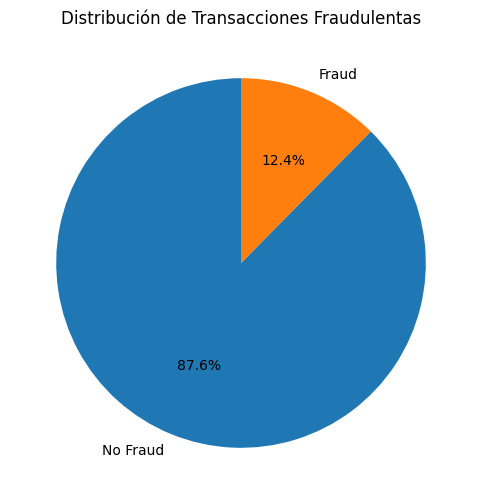

In [ ]:
# Contar la cantidad de transacciones fraudulentas y no fraudulentas en df_train
fraud_counts = df_train['is_fraud'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

In [ ]:

import pandas as pd
from sklearn.utils import resample

# Separar la clase mayoritaria y la minoritaria
df_majority = df_train[df_train.is_fraud == 0]
df_minority = df_train[df_train.is_fraud == 1]

# Upsample minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=len(df_majority),  # match number in majority class
                                 random_state=123)  # reproducible results

# Combinar la clase mayoritaria con la minoritaria upsampled
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Verificar la distribución de las clases
print(df_upsampled.is_fraud.value_counts())

df_balanceado = df_upsampled


is_fraud
0    10080
1    10080
Name: count, dtype: int64


In [ ]:
df_balanceado.T

,11966,6649,12255,4089,3505,11096,14295,10249,5119,13063,...,1393,166,1071,1443,1753,527,742,846,700,1395
category,home,misc_net,entertainment,shopping_pos,grocery_net,shopping_net,kids_pets,home,health_fitness,health_fitness,...,home,shopping_pos,gas_transport,shopping_net,shopping_pos,grocery_pos,shopping_net,shopping_net,grocery_pos,food_dining
amt,15.0,109.96,10.43,5.71,39.7,1.43,15.83,20.66,23.11,34.24,...,264.64,671.44,11.15,979.57,799.3,306.14,1113.37,966.33,302.98,112.06
city,Moriarty,Burbank,Eugene,Redford,Arnold,Norwalk,Fields Landing,Parks,Sun City,Tomales,...,Altonah,Lamy,Carroll,Honokaa,Glendale,Cardwell,Fiddletown,Parks,Glendale,Altonah
state,New Mexico,Washington,Oregon,Missouri,Missouri,California,California,Arizona,California,California,...,Utah,New Mexico,Nebraska,Hawaii,California,Missouri,California,Arizona,California,Utah
lat,34.9889,46.1966,44.0385,37.3272,38.4305,33.9056,40.7268,35.2563,33.7467,38.2427,...,40.3207,35.4311,42.277,20.0827,34.1556,36.0434,38.5234,35.2563,34.1556,40.3207
long,-106.0609,-118.9017,-123.0614,-91.0243,-90.387,-118.0818,-124.2174,-111.95,-117.1721,-122.9145,...,-110.436,-105.9409,-97.1926,-155.488,-118.2322,-90.2907,-120.6763,-111.95,-118.2322,-110.436
city_pop,7268,3684,191096,241,35439,105549,276,759,54287,337,...,302,923,566,4878,172817,1120,832,759,172817,302
merch_lat,35.191886,45.563869,44.708545,36.85701,38.952935,34.351833,40.207219,36.19785,34.645096,38.845227,...,40.532013,36.411315,41.843552,20.184493,34.036573,36.624525,39.067556,35.970915,33.253266,41.111935
merch_long,-105.832554,-118.076592,-122.072096,-91.002408,-90.990324,-117.744959,-124.512417,-112.374533,-117.275318,-122.571733,...,-110.541338,-105.841668,-97.165502,-156.069084,-117.60762,-89.565808,-120.058197,-112.022555,-118.857299,-110.198219
age,31,39,55,46,35,46,90,62,48,65,...,30,55,45,54,38,62,32,62,78,30


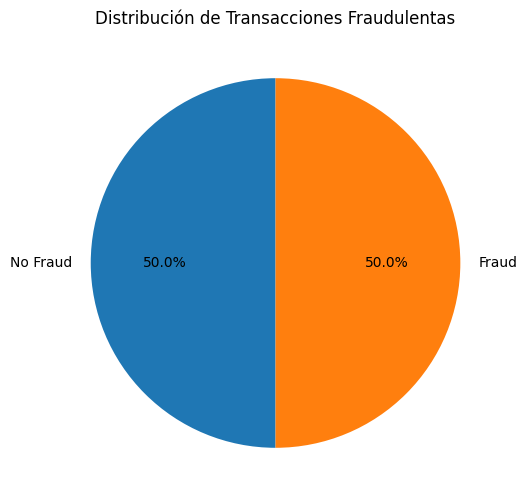

In [ ]:
# Contar la cantidad de transacciones fraudulentas y no fraudulentas en df_balanceado del train

fraud_counts = df_balanceado['is_fraud'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()



In [ ]:
# descarga el df_train en un fichero .csv llamado train

df_balanceado.to_csv('df_train_balanceado.csv', index=False)
files.download('df_train_balanceado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# actualiza X_train, y_train de f_balanceado

# Actualizar X_train y y_train con los datos balanceados de df_balanceado
X_train = df_balanceado.drop('is_fraud', axis=1)
y_train = df_balanceado['is_fraud']


In [ ]:
# columnas de X_train

print(X_train.columns)

Index(['amt', 'city_pop', 'age', 'transaction_hour', 'transaction_day',
       'transaction_month', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel',
       'profession_Administradores', 'profession_Arte', 'profession_Educación',
       'profession_Ejecutivos', 'profession_Ingeniería y Técnicos',
       'profession_Other', 'profession_Salud', 'fraud_category_merchant_0',
       'fraud_category_merchant_2', 'fraud_category_merchant_3',
       'fraud_category_merchant_4', 'fraud_category_merchant_5'],
      dtype='object')


In [ ]:
# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma las columnas numéricas seleccionadas de X_train balanceado
X_train[['amt', 'city_pop', 'age', 'transaction_hour','transaction_day', 'transaction_month']] = scaler.fit_transform(X_train[['amt', 'city_pop', 'age', 'transaction_hour','transaction_day', 'transaction_month']])


In [ ]:
X_train

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,profession_Educación,profession_Ejecutivos,profession_Ingeniería y Técnicos,profession_Other,profession_Salud,fraud_category_merchant_0,fraud_category_merchant_2,fraud_category_merchant_3,fraud_category_merchant_4,fraud_category_merchant_5
11966,-0.474842,-0.337811,-0.988781,-0.145075,-0.490239,-0.994934,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1572,3.723216,0.234946,0.517420,1.364673,-0.176896,0.517963,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6649,-0.054651,-0.350335,-0.525334,-1.517573,1.180922,1.085299,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12255,-0.495064,0.304578,0.401558,-1.380323,-0.385792,-0.994934,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4089,-0.515950,-0.362367,-0.119819,0.815674,0.867579,1.085299,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,-0.529224,-0.361151,1.560174,0.678424,1.076474,1.085299,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
13140,-0.233905,-0.357097,-0.119819,-0.556824,-0.072449,-0.994934,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
12577,0.108805,-0.362052,1.212589,1.227423,-0.385792,-0.994934,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4493,-0.215896,-0.357181,0.285697,-1.243073,0.972027,1.085299,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
# X_train describe
X_train.describe()

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month
count,1.150600e+04,1.150600e+04,1.150600e+04,1.150600e+04,1.150600e+04,1.150600e+04
mean,-3.334722e-17,-3.705246e-18,8.398558e-17,-8.336804e-18,-8.892591e-17,1.729115e-17
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-5.367910e-01,-3.630481e-01,-1.741881e+00,-1.792073e+00,-1.848057e+00,-9.949341e-01
25%,-4.885925e-01,-3.614860e-01,-8.149884e-01,-8.313240e-01,-9.080293e-01,-9.949341e-01
50%,-3.132881e-01,-3.574603e-01,-1.198190e-01,1.294247e-01,1.364463e-01,-4.275978e-01
75%,-9.580307e-02,-2.393669e-01,6.332813e-01,9.529235e-01,9.720268e-01,1.085299e+00
max,1.389054e+01,7.967395e+00,2.602928e+00,1.364673e+00,1.285370e+00,1.085299e+00


In [ ]:
# Ajusta y transforma las columnas seleccionadas de X_test
X_test[['amt', 'city_pop', 'age', 'transaction_hour','transaction_day', 'transaction_month']] = scaler.fit_transform(X_test[['amt', 'city_pop', 'age', 'transaction_hour','transaction_day', 'transaction_month']])

In [ ]:
X_test

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,profession_Educación,profession_Ejecutivos,profession_Ingeniería y Técnicos,profession_Other,profession_Salud,fraud_category_merchant_0,fraud_category_merchant_2,fraud_category_merchant_3,fraud_category_merchant_4,fraud_category_merchant_5
6322,-0.392998,-0.264978,-0.777422,0.841117,1.103666,1.101186,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
7863,-0.316800,-0.379385,-0.420302,-1.090493,-1.841345,-0.983722,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
5594,-0.180859,-0.375579,0.293938,-1.228465,1.103666,1.101186,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
13858,-0.496068,-0.377013,2.079539,0.979089,0.157056,-0.983722,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7967,-0.231853,-0.203146,-0.063182,-0.262660,-1.841345,-0.983722,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,-0.375750,-0.375842,-0.241742,-1.504409,1.314024,1.101186,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
10468,-0.168444,-0.375514,-0.122702,-1.642381,-0.999913,-0.983722,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
9449,0.175094,3.925892,-0.598862,0.013284,-1.315450,-0.983722,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2785,-0.021589,-0.378509,-0.896462,-0.952521,0.788129,1.101186,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
# X_test describe
X_test.describe()

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month
count,2.877000e+03,2.877000e+03,2.877000e+03,2.877000e+03,2.877000e+03,2.877000e+03
mean,1.975788e-17,2.346248e-17,6.915258e-17,4.198549e-17,1.049637e-16,-5.680390e-17
std,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00
min,-5.138157e-01,-3.810873e-01,-1.789262e+00,-1.780353e+00,-1.841345e+00,-9.837222e-01
25%,-4.667385e-01,-3.795684e-01,-7.774220e-01,-8.145485e-01,-8.947341e-01,-9.837222e-01
50%,-3.058846e-01,-3.755137e-01,-1.227018e-01,1.512562e-01,1.570556e-01,-4.151107e-01
75%,-1.086604e-01,-2.407742e-01,6.510583e-01,8.411166e-01,8.933083e-01,1.101186e+00
max,1.262505e+01,7.439348e+00,2.674739e+00,1.393005e+00,1.314024e+00,1.101186e+00


In [ ]:
# tamaño de xtrain
print(X_train.shape)

(11506, 32)


In [ ]:
# tamaño de xtest
print(X_test.shape)

(2877, 32)


# Modelamiento con MLP - versión 1

In [ ]:
# Define el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(32,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Muestra la arquitectura del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Crea el callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrena el modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)


Epoch 1/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9194 - loss: 0.2441 - val_accuracy: 0.9771 - val_loss: 0.0761
Epoch 2/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9811 - loss: 0.0591 - val_accuracy: 0.9875 - val_loss: 0.0454
Epoch 3/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9910 - val_loss: 0.0326
Epoch 4/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9913 - val_loss: 0.0289
Epoch 5/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9903 - val_loss: 0.0267
Epoch 6/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9896 - val_loss: 0.0286
Epoch 7/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 8/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0206 - val_acc

In [ ]:
def plot_loss_historia_keras(history):
    # Graficar el histórico de pérdida durante el entrenamiento
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

def plot_acc_historia_keras(history):
    # Graficar la precisión durante el entrenamiento
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

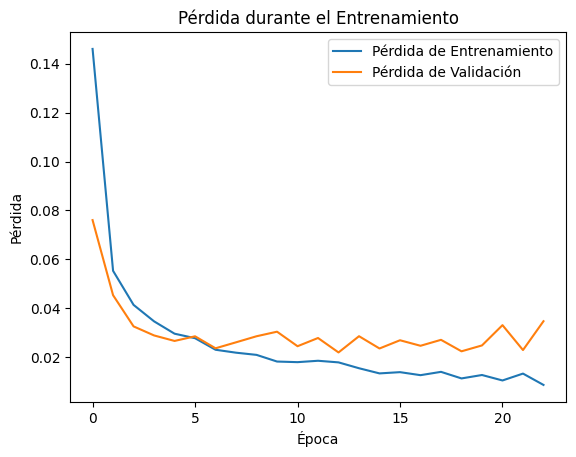

In [ ]:
plot_loss_historia_keras(history)

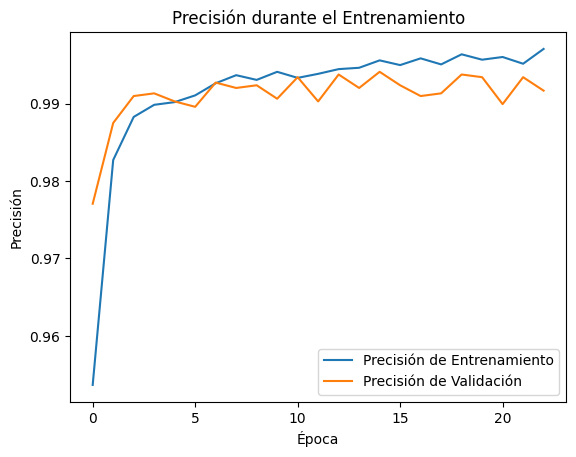

In [ ]:
plot_acc_historia_keras(history)

In [ ]:
# Evaluando el modelo en TRAIN
loss, accuracy = model.evaluate(X_train, y_train)
print('Loss:', loss)
print('Accuracy:', accuracy)

360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9961 - loss: 0.0119
Loss: 0.010903986170887947
Accuracy: 0.9964366555213928


In [ ]:
# Evaluando el modelo de predicción de TEST
print("[INFO]: Evaluando red neuronal...")
model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
#print('Loss {}, accuracy {}'.format(loss,accuracy))
print('Loss:', loss)
print('Accuracy:', accuracy)

[INFO]: Evaluando red neuronal...
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9945 - loss: 0.0173
Loss: 0.02199372835457325
Accuracy: 0.9937434792518616


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


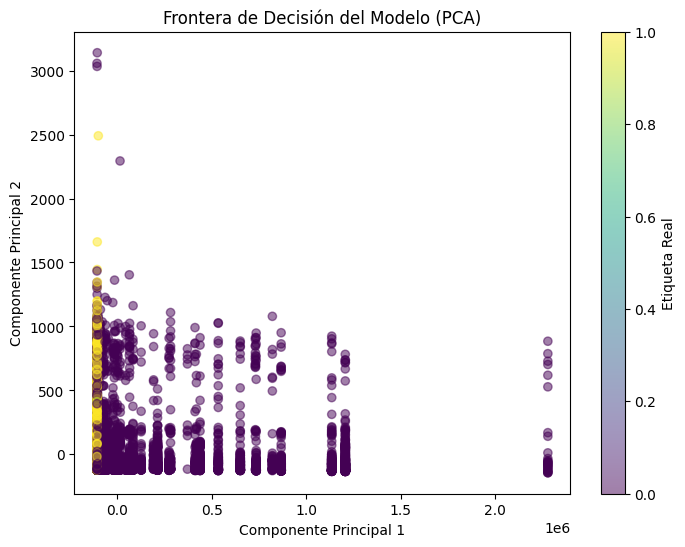

In [ ]:
# Generación de la gráfica de la frontera de decision generada por model

# Reduce la dimensionalidad de los datos a 2 componentes principales
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Obtiene las predicciones del modelo para los datos reducidos
y_pred = model.predict(X)

# Crea la gráfica de la frontera de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión del Modelo (PCA)')
plt.colorbar(label='Etiqueta Real')

plt.show()

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
# Crea un DataFrame con y_test e y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})

# Muestra el DataFrame
print(comparison_df)

       y_test  y_pred
6322        0       0
7863        0       0
5594        0       0
13858       0       0
7967        0       0
...       ...     ...
7169        0       0
10468       0       0
9449        0       0
2785        0       0
7118        0       0

[2877 rows x 2 columns]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2521
           1       0.99      0.96      0.97       356

    accuracy                           0.99      2877
   macro avg       0.99      0.98      0.99      2877
weighted avg       0.99      0.99      0.99      2877



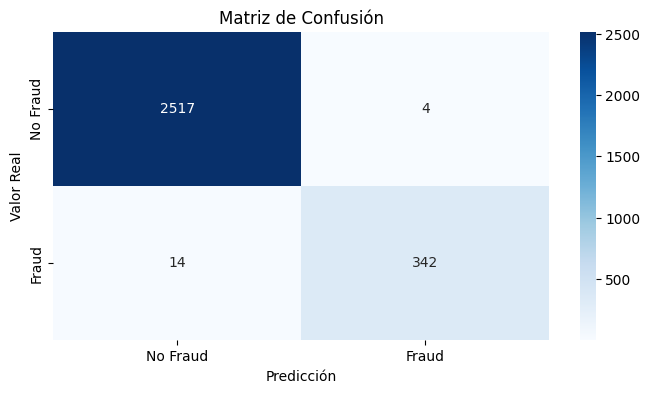

In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprime el reporte de clasificación
print(classification_report(y_test, y_pred))

# Crea la gráfica de la matriz de confusión
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

El Modelo 1 presenta Overfitting a pesar que el accurracy es 0.97

Se le aplica la técnica de seguimiento del error de validación:  Early Stopping.

La precisión de la clase 0 es 0.98, en cambio la precisión de la clase 1 es 0.94

Hay 58 casos de falsos negativos.

# Modelamiento con MLP - versión 2

In [ ]:
# Define el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(32,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.05))  # Regularización con Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))  # Regularización con Dropout
model.add(Dense(16, activation='tanh'))
#model.add(Dropout(0.2))  # Regularización con Dropout
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Muestra la arquitectura del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Crea el callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrena el modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9062 - loss: 0.2970 - val_accuracy: 0.9767 - val_loss: 0.0991
Epoch 2/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9764 - loss: 0.0967 - val_accuracy: 0.9819 - val_loss: 0.0751
Epoch 3/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0682 - val_accuracy: 0.9819 - val_loss: 0.0692
Epoch 4/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9839 - loss: 0.0673 - val_accuracy: 0.9844 - val_loss: 0.0583
Epoch 5/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9870 - loss: 0.0559 - val_accuracy: 0.9871 - val_loss: 0.0492
Epoch 6/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0477 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 7/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9877 - loss: 0.0458 - val_accuracy: 0.9927 - val_loss: 0.0379
Epoch 8/200
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0420 - val_accu

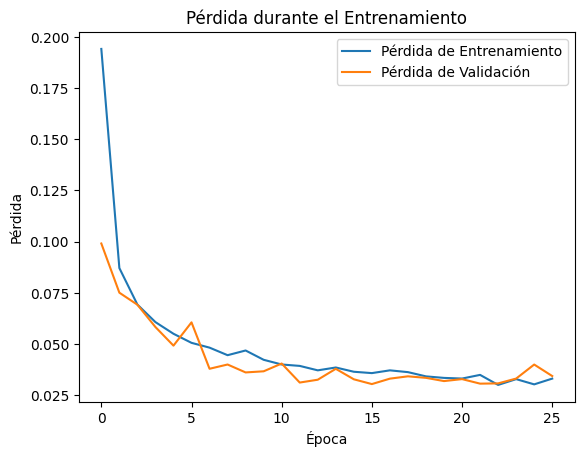

In [ ]:
plot_loss_historia_keras(history)

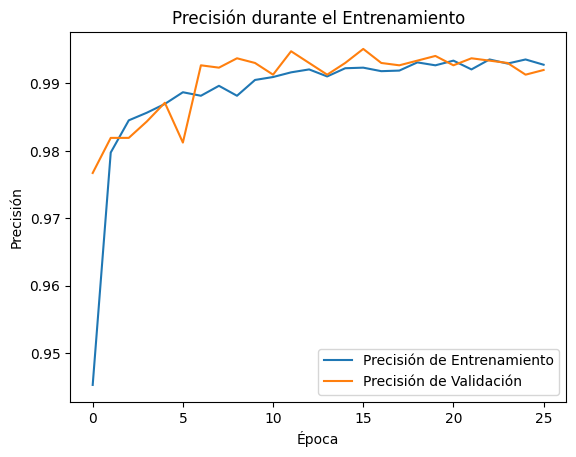

In [ ]:
plot_acc_historia_keras(history)

In [ ]:
# Evaluando el modelo en TRAIN
loss, accuracy = model.evaluate(X_train, y_train)
print('Loss:', loss)
print('Accuracy:', accuracy)

360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9945 - loss: 0.0301
Loss: 0.02950100041925907
Accuracy: 0.994350790977478


In [ ]:
# Evaluando el modelo de predicción de TEST
print("[INFO]: Evaluando red neuronal...")
model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

[INFO]: Evaluando red neuronal...
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0287
Loss: 0.03041905164718628
Accuracy: 0.9951338171958923


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


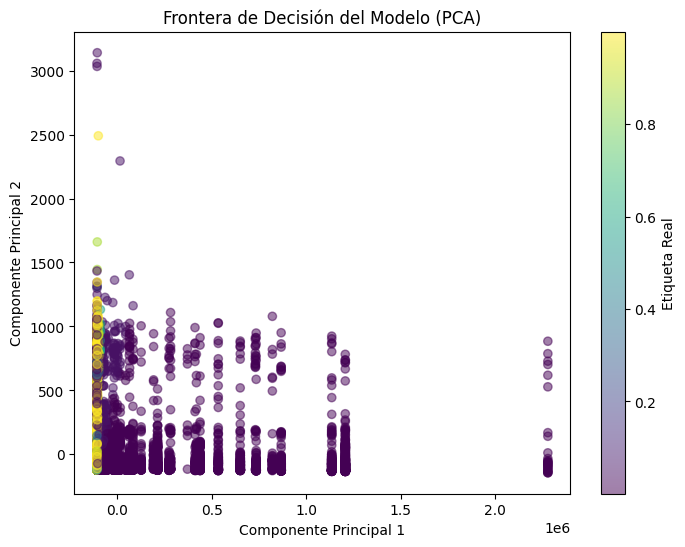

In [ ]:
# Generación de la gráfica de la frontera de decision generada por model

# Reduce la dimensionalidad de los datos a 2 componentes principales
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Obtiene las predicciones del modelo para los datos reducidos
y_pred = model.predict(X)

# Crea la gráfica de la frontera de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión del Modelo (PCA)')
plt.colorbar(label='Etiqueta Real')

plt.show()

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
# Crea un DataFrame con y_test e y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})

# Muestra el DataFrame
print(comparison_df)

       y_test  y_pred
6322        0       0
7863        0       0
5594        0       0
13858       0       0
7967        0       0
...       ...     ...
7169        0       0
10468       0       0
9449        0       0
2785        0       0
7118        0       0

[2877 rows x 2 columns]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2521
           1       0.98      0.98      0.98       356

    accuracy                           1.00      2877
   macro avg       0.99      0.99      0.99      2877
weighted avg       1.00      1.00      1.00      2877



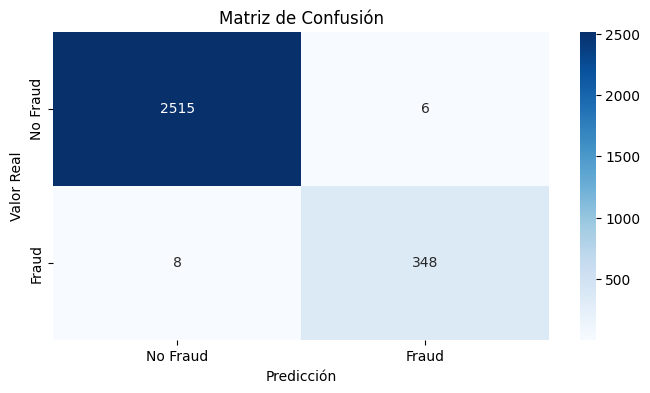

In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprime el reporte de clasificación
print(classification_report(y_test, y_pred))

# Crea la gráfica de la matriz de confusión
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

En este Modelo 2 se aplica técnicas de regularización: L2, Dropout.

Se le aplica la técnica de seguimiento del error de validación:  Early Stopping.

El modelo ya no presenta Overfitting, el accurracy es 0.98

La precisión de la clase 0 es 0.98 y la precisión de la clase 1 mejora a 0.95.

Se reduce a 47 casos de falsos negativos.

# Modelamiento con MLP - versión 3

In [ ]:
# Define el modelo
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(32,), kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.05))  # Regularización con Dropout
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.05))  # Regularización con Dropout
model.add(Dense(4, activation='tanh'))
#model.add(Dropout(0.05))  # Regularización con Dropout
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Función de tasa de aprendizaje variable (decaimiento por pasos)
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

# Compilación del modelo con tasa de aprendizaje inicial
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Muestra la arquitectura del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,677 (6.55 KB)

 Trainable params: 1,677 (6.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Tasa de aprendizaje variable
lr_scheduler = LearningRateScheduler(lr_schedule)

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler], verbose=1)


Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9083 - loss: 0.3795 - val_accuracy: 0.9499 - val_loss: 0.2166 - learning_rate: 0.0010
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.2032 - val_accuracy: 0.9590 - val_loss: 0.1871 - learning_rate: 0.0010
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1704 - val_accuracy: 0.9541 - val_loss: 0.1890 - learning_rate: 0.0010
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1630 - val_accuracy: 0.9604 - val_loss: 0.1781 - learning_rate: 0.0010
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9640 - loss: 0.1651 - val_accuracy: 0.9597 - val_loss: 0.1788 - learning_rate: 0.0010
Epoch 6/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9641 - loss: 0.1613 - val_accuracy: 0.9597 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 7/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.

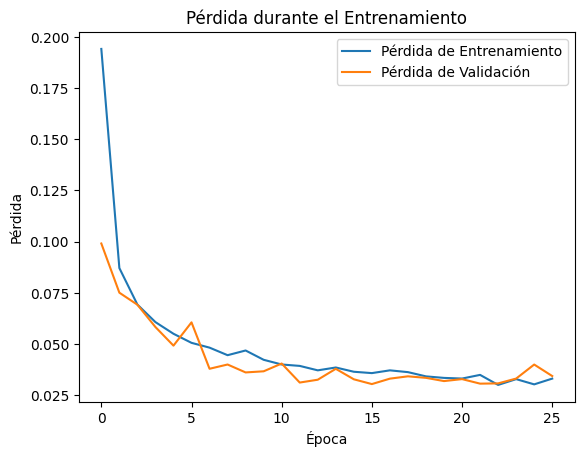

In [ ]:
plot_loss_historia_keras(history)

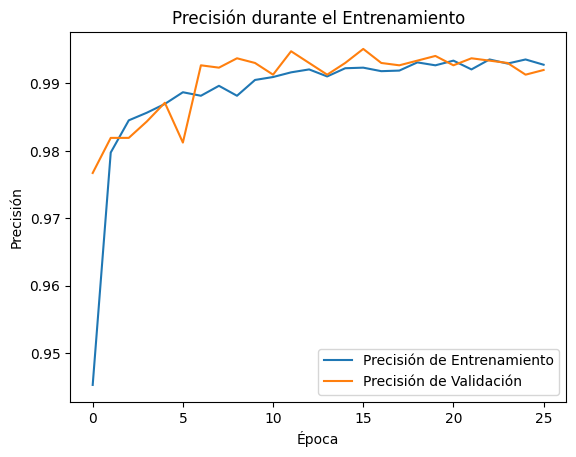

In [ ]:
plot_acc_historia_keras(history)

In [ ]:
# Evaluando el modelo en TRAIN
loss, accuracy = model.evaluate(X_train, y_train)
print('Loss:', loss)
print('Accuracy:', accuracy)

360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9648 - loss: 0.1579
Loss: 0.15714828670024872
Accuracy: 0.9653224349021912


In [ ]:
# Evaluando el modelo de predicción de TEST
print("[INFO]: Evaluando red neuronal...")
model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
#print('Loss {}, accuracy {}'.format(loss,accuracy))
print('Loss:', loss)
print('Accuracy:', accuracy)

[INFO]: Evaluando red neuronal...
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0.1575
Loss: 0.1707860678434372
Accuracy: 0.961765706539154


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


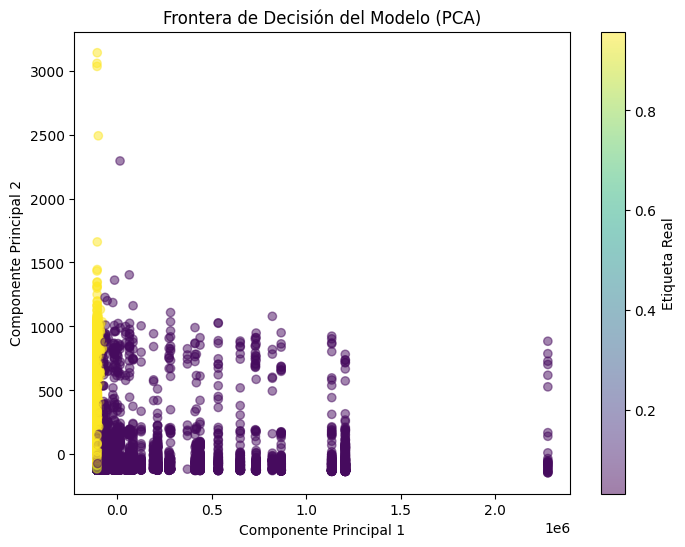

In [ ]:
# Generación de la gráfica de la frontera de decision generada por model

# Reduce la dimensionalidad de los datos a 2 componentes principales
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Obtiene las predicciones del modelo para los datos reducidos
y_pred = model.predict(X)

# Crea la gráfica de la frontera de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión del Modelo (PCA)')
plt.colorbar(label='Etiqueta Real')

plt.show()

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
# Crea un DataFrame con y_test e y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})

# Muestra el DataFrame
print(comparison_df)

       y_test  y_pred
6322        0       0
7863        0       0
5594        0       0
13858       0       0
7967        0       0
...       ...     ...
7169        0       0
10468       0       0
9449        0       0
2785        0       0
7118        0       0

[2877 rows x 2 columns]


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2521
           1       0.95      0.73      0.83       356

    accuracy                           0.96      2877
   macro avg       0.96      0.86      0.90      2877
weighted avg       0.96      0.96      0.96      2877



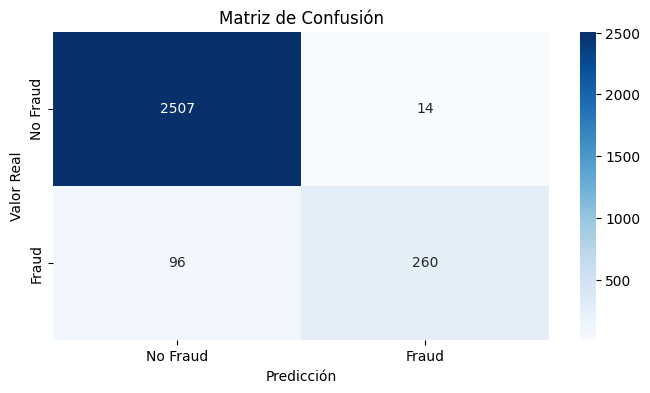

In [ ]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprime el reporte de clasificación
print(classification_report(y_test, y_pred))

# Crea la gráfica de la matriz de confusión
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

En este Modelo 3 se aplica técnicas de regularización: L2, Dropout.

Se le aplica la técnica de seguimiento del error de validación:  Early Stopping.

También se aplica una Tasa de aprendizaje variable.

El modelo no presenta Overfitting, el accurracy es 0.98

La precisión de la clase 0 es 0.98 y la precisión de la clase 1 mejora a 0.96.

Pero tiene 55 casos de falsos negativos.

# Explicabilidad

Ahora intentemos explicar/interpretar la red. Que caracteristicas son las que están aportando mas valor a la predicciones. Así, a primera vista, podemos ver que la red neural tiene un rendimiento perfecto, pero no sabemos que es lo que hace.

Se va a convertir esa caja negra el algo mas explicable.

In [ ]:
X_train

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,profession_Educación,profession_Ejecutivos,profession_Ingeniería y Técnicos,profession_Other,profession_Salud,fraud_category_merchant_0,fraud_category_merchant_2,fraud_category_merchant_3,fraud_category_merchant_4,fraud_category_merchant_5
11966,-0.474842,-0.337811,-0.988781,-0.145075,-0.490239,-0.994934,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1572,3.723216,0.234946,0.517420,1.364673,-0.176896,0.517963,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6649,-0.054651,-0.350335,-0.525334,-1.517573,1.180922,1.085299,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12255,-0.495064,0.304578,0.401558,-1.380323,-0.385792,-0.994934,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4089,-0.515950,-0.362367,-0.119819,0.815674,0.867579,1.085299,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,-0.529224,-0.361151,1.560174,0.678424,1.076474,1.085299,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
13140,-0.233905,-0.357097,-0.119819,-0.556824,-0.072449,-0.994934,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
12577,0.108805,-0.362052,1.212589,1.227423,-0.385792,-0.994934,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4493,-0.215896,-0.357181,0.285697,-1.243073,0.972027,1.085299,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
X_test

,amt,city_pop,age,transaction_hour,transaction_day,transaction_month,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,profession_Educación,profession_Ejecutivos,profession_Ingeniería y Técnicos,profession_Other,profession_Salud,fraud_category_merchant_0,fraud_category_merchant_2,fraud_category_merchant_3,fraud_category_merchant_4,fraud_category_merchant_5
6322,-0.392998,-0.264978,-0.777422,0.841117,1.103666,1.101186,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
7863,-0.316800,-0.379385,-0.420302,-1.090493,-1.841345,-0.983722,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
5594,-0.180859,-0.375579,0.293938,-1.228465,1.103666,1.101186,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
13858,-0.496068,-0.377013,2.079539,0.979089,0.157056,-0.983722,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7967,-0.231853,-0.203146,-0.063182,-0.262660,-1.841345,-0.983722,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,-0.375750,-0.375842,-0.241742,-1.504409,1.314024,1.101186,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
10468,-0.168444,-0.375514,-0.122702,-1.642381,-0.999913,-0.983722,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
9449,0.175094,3.925892,-0.598862,0.013284,-1.315450,-0.983722,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2785,-0.021589,-0.378509,-0.896462,-0.952521,0.788129,1.101186,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
y_train

,is_fraud
11966,0
1572,1
6649,0
12255,0
4089,0
...,...
6260,0
13140,0
12577,0
4493,0


In [ ]:
y_test

,is_fraud
6322,0
7863,0
5594,0
13858,0
7967,0
...,...
7169,0
10468,0
9449,0
2785,0


In [ ]:
# prompt: columnas de df

df.columns

Index(['amt', 'city_pop', 'is_fraud', 'age', 'transaction_hour',
       'transaction_day', 'transaction_month', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'profession_Administradores', 'profession_Arte', 'profession_Educación',
       'profession_Ejecutivos', 'profession_Ingeniería y Técnicos',
       'profession_Other', 'profession_Salud', 'fraud_category_merchant_0',
       'fraud_category_merchant_2', 'fraud_category_merchant_3',
       'fraud_category_merchant_4', 'fraud_category_merchant_5'],
      dtype='object')

In [ ]:
#instalamos SHAP
!pip install shap

In [ ]:
import shap

In [ ]:
# 50 muestras de X_train

# Sample 50 instances from X_train and corresponding y_train
X_train_sampled = X_train.sample(n=50, random_state=42)  # Use random_state for reproducibility
y_train_sampled = y_train.loc[X_train_sampled.index]

# Now X_train_sampled and y_train_sampled contain 1000 random samples
print(X_train_sampled.shape)
y_train_sampled.shape

(50, 32)


(50,)

In [ ]:
import shap
import numpy as np
import pandas as pd

# Convert X_train to a NumPy array with float32 dtype
X_train_np = X_train_sampled.to_numpy().astype(np.float32)

# Define a wrapper function for your model's predict method
def model_predict_wrapper(data):
    """Wrapper function to handle data type conversion for prediction."""
    # Convert the input data to a pandas DataFrame with the original column names
    data_df = pd.DataFrame(data, columns=X_train.columns)

    # Ensure the DataFrame's columns have the correct dtype
    # Adjust dtypes if necessary based on your model's requirements
    for col in data_df.columns:
        if data_df[col].dtype == 'object':
            data_df[col] = data_df[col].astype(str) # Example: Convert object to string
        # Add other dtype conversions if needed

    # Make predictions using your Keras model
    predictions = model.predict(data_df)
    return predictions

# Initialize the KernelExplainer with the wrapper function and the NumPy array
explainer = shap.KernelExplainer(model_predict_wrapper, X_train_np)

# Calculate SHAP values
# (Convert X_test to numpy and float32 for consistency)
shap_values = explainer.shap_values(X_test.to_numpy().astype(np.float32)[:30,:])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

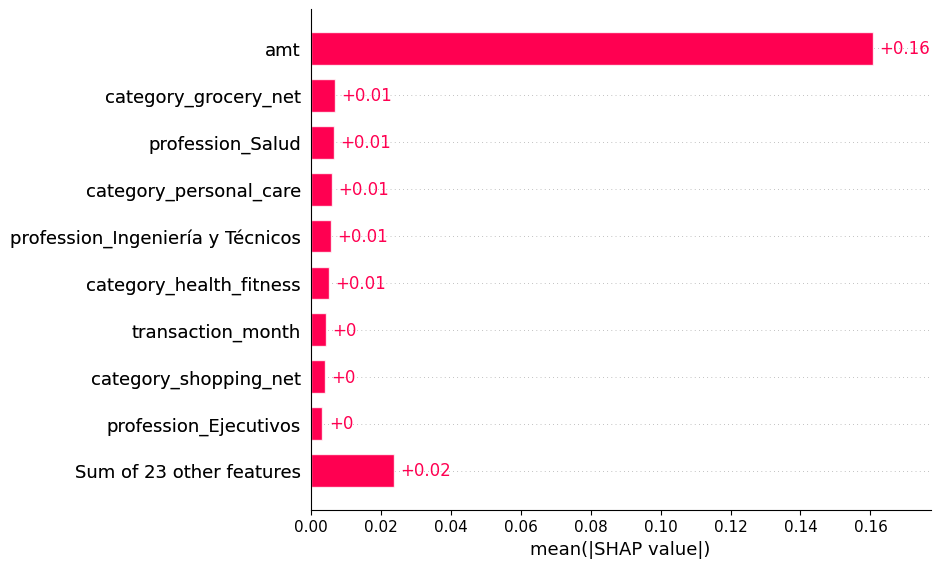

In [ ]:
shap_values_class_0 = shap_values[:,:,0]
shap_values_exp = shap.Explanation(values=shap_values_class_0, base_values=explainer.expected_value, data=X_train,feature_names=df.columns)
shap.plots.bar(shap_values_exp)

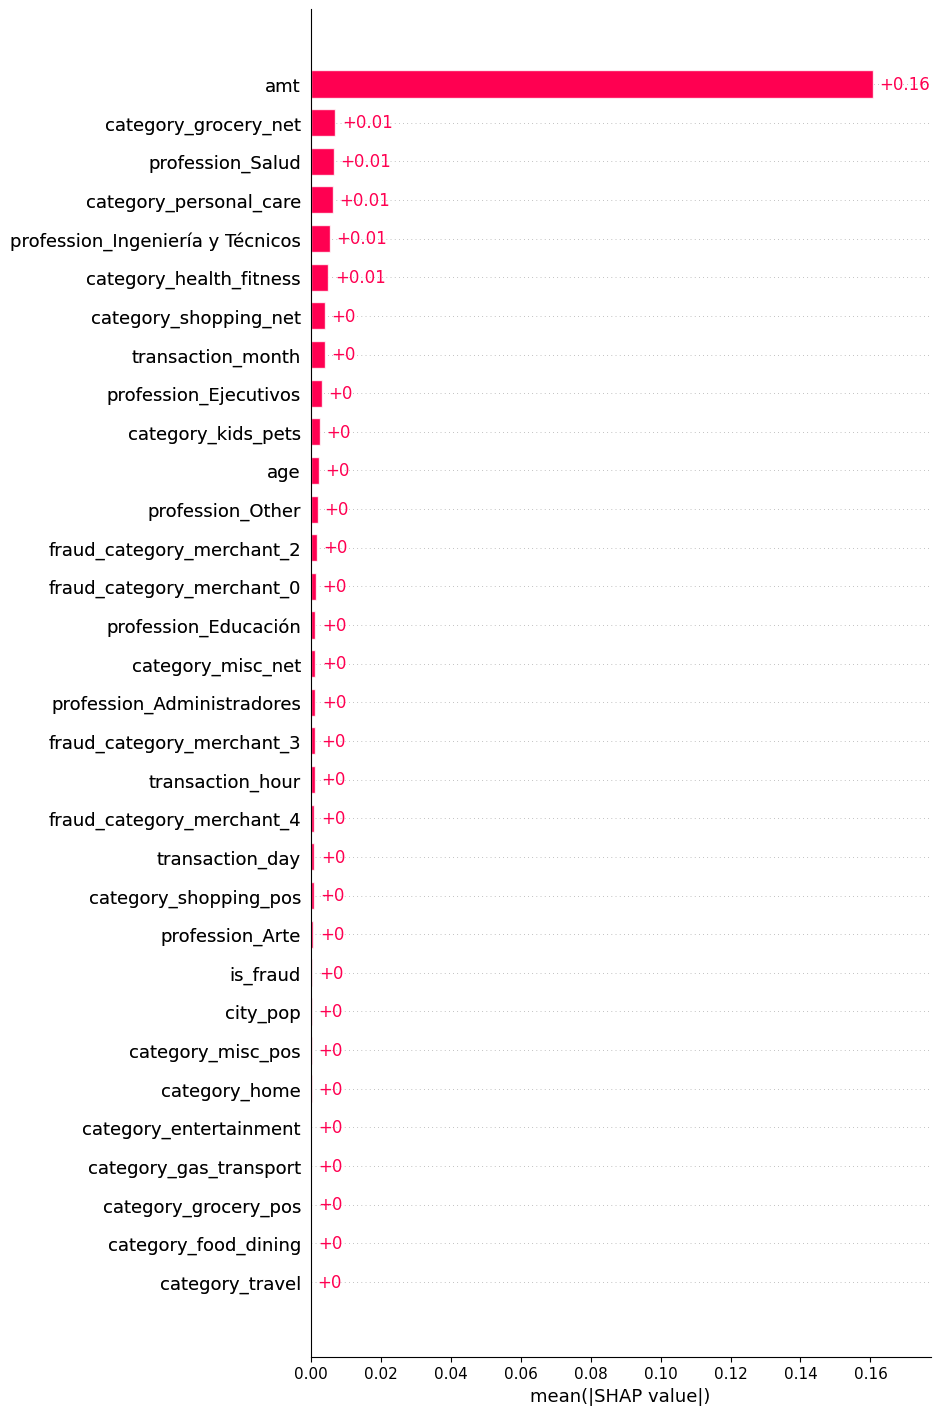

In [ ]:
shap.plots.bar(shap_values_exp, max_display=X_train.shape[0])

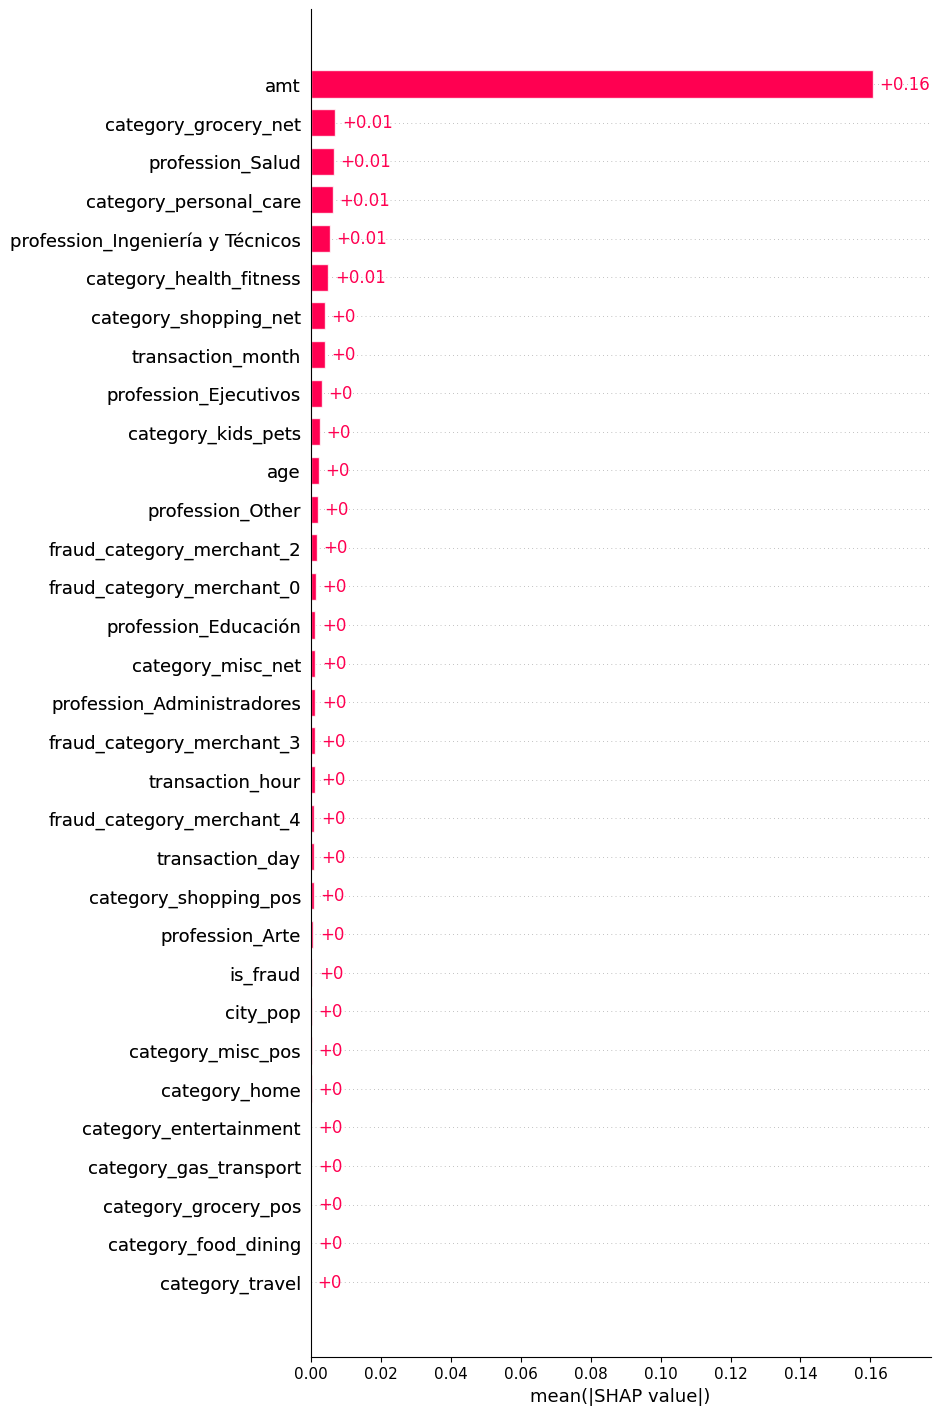

In [ ]:
shap.plots.bar(shap_values_exp, max_display=X_train.shape[1])

In [ ]:
import shap
import numpy as np
import pandas as pd

# Convert X_train to a NumPy array with float32 dtype
X_train_np = X_train_sampled.to_numpy().astype(np.float32)

# Define a wrapper function for your model's predict method
def model_predict_wrapper(data):
    """Wrapper function to handle data type conversion for prediction."""
    # Convert the input data to a pandas DataFrame with the original column names
    data_df = pd.DataFrame(data, columns=X_train.columns)

    # Ensure the DataFrame's columns have the correct dtype
    # Adjust dtypes if necessary based on your model's requirements
    for col in data_df.columns:
        if data_df[col].dtype == 'object':
            data_df[col] = data_df[col].astype(str) # Example: Convert object to string
        # Add other dtype conversions if needed

    # Make predictions using your Keras model
    predictions = model.predict(data_df)
    return predictions

# Initialize the KernelExplainer with the wrapper function and the NumPy array
explainer = shap.Explainer(model_predict_wrapper, X_train_np,feature_names=df.columns)

# Calculate SHAP values
# (Convert X_test to numpy and float32 for consistency)
shap_values = explainer.shap_values(X_test.to_numpy().astype(np.float32)[:30,:])

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━

PermutationExplainer explainer:  27%|██▋       | 8/30 [00:00<?, ?it/s]

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 10/30 [00:11<00:11,  1.73it/s]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 11/30 [00:12<00:17,  1.10it/s]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 12/30 [00:14<00:20,  1.15s/it]

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  43%|████▎     | 13/30 [00:15<00:18,  1.08s/it]

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 14/30 [00:16<00:16,  1.05s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  50%|█████     | 15/30 [00:17<00:14,  1.01it/s]

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  53%|█████▎    | 16/30 [00:18<00:14,  1.00s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  57%|█████▋    | 17/30 [00:19<00:12,  1.02it/s]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  60%|██████    | 18/30 [00:20<00:11,  1.00it/s]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  63%|██████▎   | 19/30 [00:21<00:11,  1.01s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 20/30 [00:22<00:10,  1.05s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  70%|███████   | 21/30 [00:23<00:09,  1.00s/it]

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  73%|███████▎  | 22/30 [00:24<00:08,  1.01s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 23/30 [00:25<00:07,  1.12s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 24/30 [00:27<00:07,  1.25s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  83%|████████▎ | 25/30 [00:28<00:06,  1.23s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  87%|████████▋ | 26/30 [00:29<00:04,  1.13s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  90%|█████████ | 27/30 [00:30<00:03,  1.09s/it]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  93%|█████████▎| 28/30 [00:31<00:02,  1.04s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  97%|█████████▋| 29/30 [00:32<00:01,  1.00s/it]

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer: 100%|██████████| 30/30 [00:33<00:00,  1.01it/s]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer: 31it [00:34,  1.49s/it]


In [ ]:
explanation = shap.Explanation(shap_values, data=X_test.to_numpy().astype(np.float32)[:30,:], feature_names=df.columns)

In [ ]:
# Assuming you want to plot the SHAP values for the primera class (index 0)
shap_values_class_0 = explanation[:, 0]  # Select SHAP values for the desired class
shap_values_class_0

.values =
array([-0.11499898, -0.08593237, -0.081877  , -0.06934192, -0.08388453,
       -0.08677275, -0.08353012, -0.0897932 , -0.08149334,  0.80499948,
       -0.08413216, -0.08188223,  0.83814637, -0.08891074,  0.78635312,
       -0.0829466 , -0.10923832, -0.09877003, -0.09138823, -0.07819144,
       -0.10456217, -0.08457917, -0.09030364, -0.08930664, -0.08694818,
       -0.08725131, -0.07951532, -0.07887569, -0.09124435, -0.10351596])

.data =
array([-3.92998189e-01, -3.16799849e-01, -1.80859312e-01, -4.96068031e-01,
       -2.31852636e-01, -3.11592191e-01, -4.97984439e-01, -3.54544908e-01,
       -4.57198113e-01,  3.39717197e+00, -4.39325452e-01, -4.94151622e-01,
        4.09653854e+00, -2.16937929e-01,  3.54377770e+00, -5.03317058e-01,
       -4.34784383e-01, -7.57909613e-04, -4.87777442e-01,  1.09560974e-01,
       -1.73390713e-02, -1.96398944e-01, -4.79695171e-01, -2.74722010e-01,
       -4.62489098e-01, -4.80195105e-01, -4.80945021e-01, -4.96692955e-01,
        4.63609174e-02,

clase 0


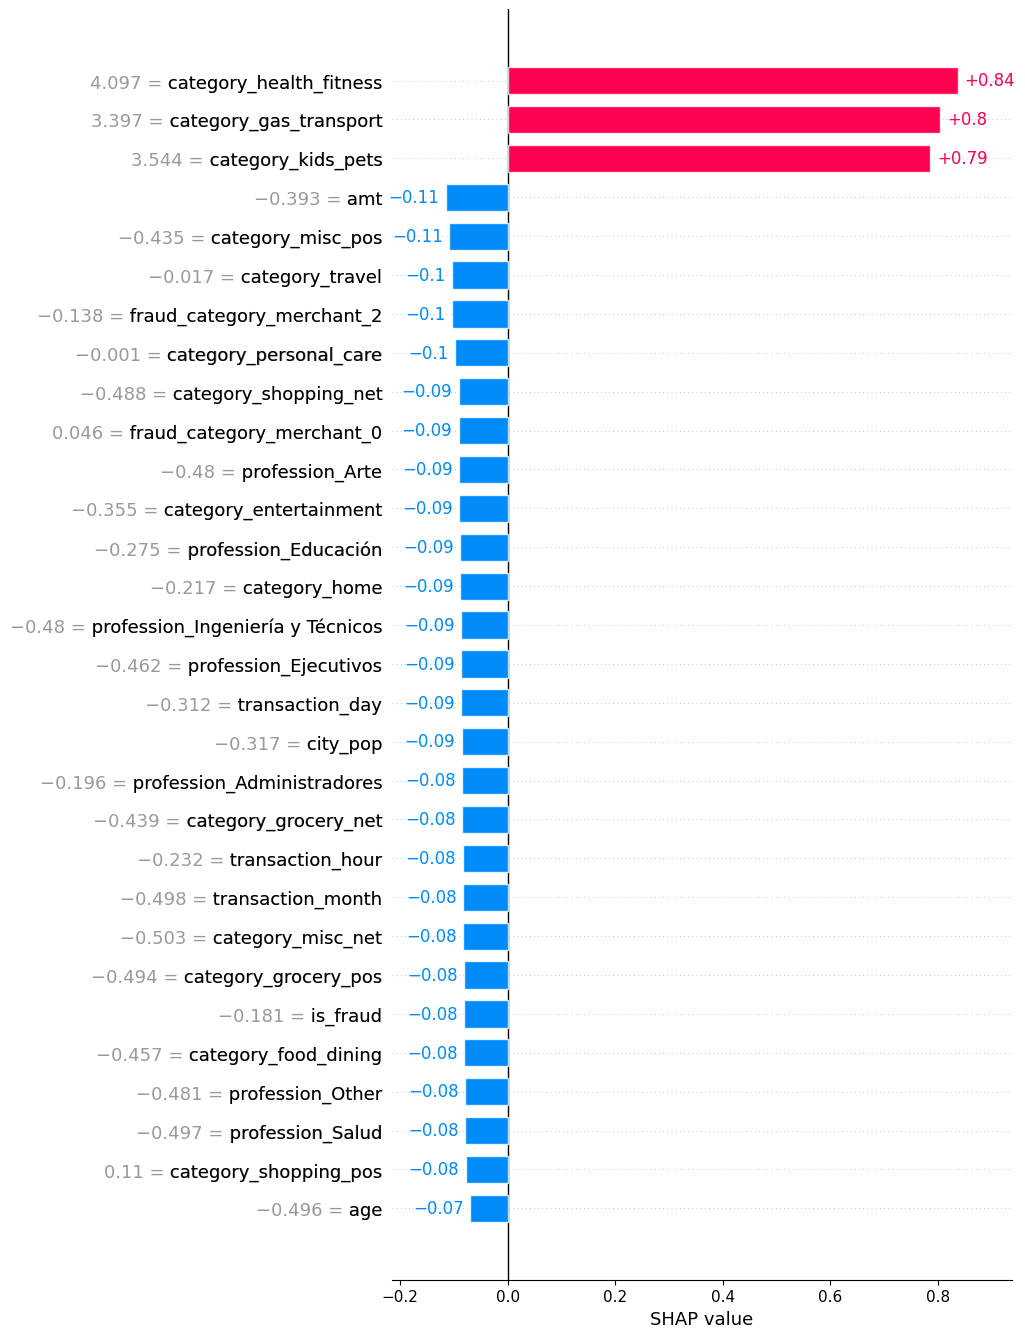

In [ ]:
print("clase 0")
shap.plots.bar(shap_values_class_0, max_display=X_train.shape[0])

In [ ]:
# Assuming you want to plot the SHAP values for the second class (index 1)
shap_values_class_1 = explanation[:, 1]  # Select SHAP values for the desired class
shap_values_class_1

.values =
array([ 2.12870069e-04,  2.71033734e-04,  6.14375845e-05,  1.08849034e-05,
        1.77484840e-04,  4.36192229e-05, -1.50567144e-05,  2.08765693e-04,
        6.32226467e-07,  1.16849631e-04,  2.05863617e-04, -5.92854545e-05,
       -2.92109773e-05,  2.25474350e-04,  2.10452519e-04, -3.43514979e-06,
        9.23412152e-04,  1.05670184e-03,  2.22120389e-04,  5.78628778e-05,
        6.01268113e-05, -8.90322030e-07, -2.16825552e-04,  1.82619981e-04,
        3.34159501e-04, -4.46548708e-04,  3.11036579e-04, -7.09857792e-06,
       -1.30506933e-04,  2.76808865e-04])

.data =
array([-0.2649782 , -0.37938473, -0.37557927, -0.37701288, -0.20314604,
       -0.37927976,  0.11680123, -0.37442124, -0.37517905, -0.38044763,
       -0.38103813, -0.03497754, -0.38074946, -0.37926334, -0.38039187,
       -0.38044763, -0.37970623, -0.3791551 , -0.37346986, -0.37830216,
       -0.379306  , -0.37850884,  0.02349531, -0.38044763, -0.3592486 ,
       -0.07743138, -0.37346986, -0.26410556, -0.07281

clase 1


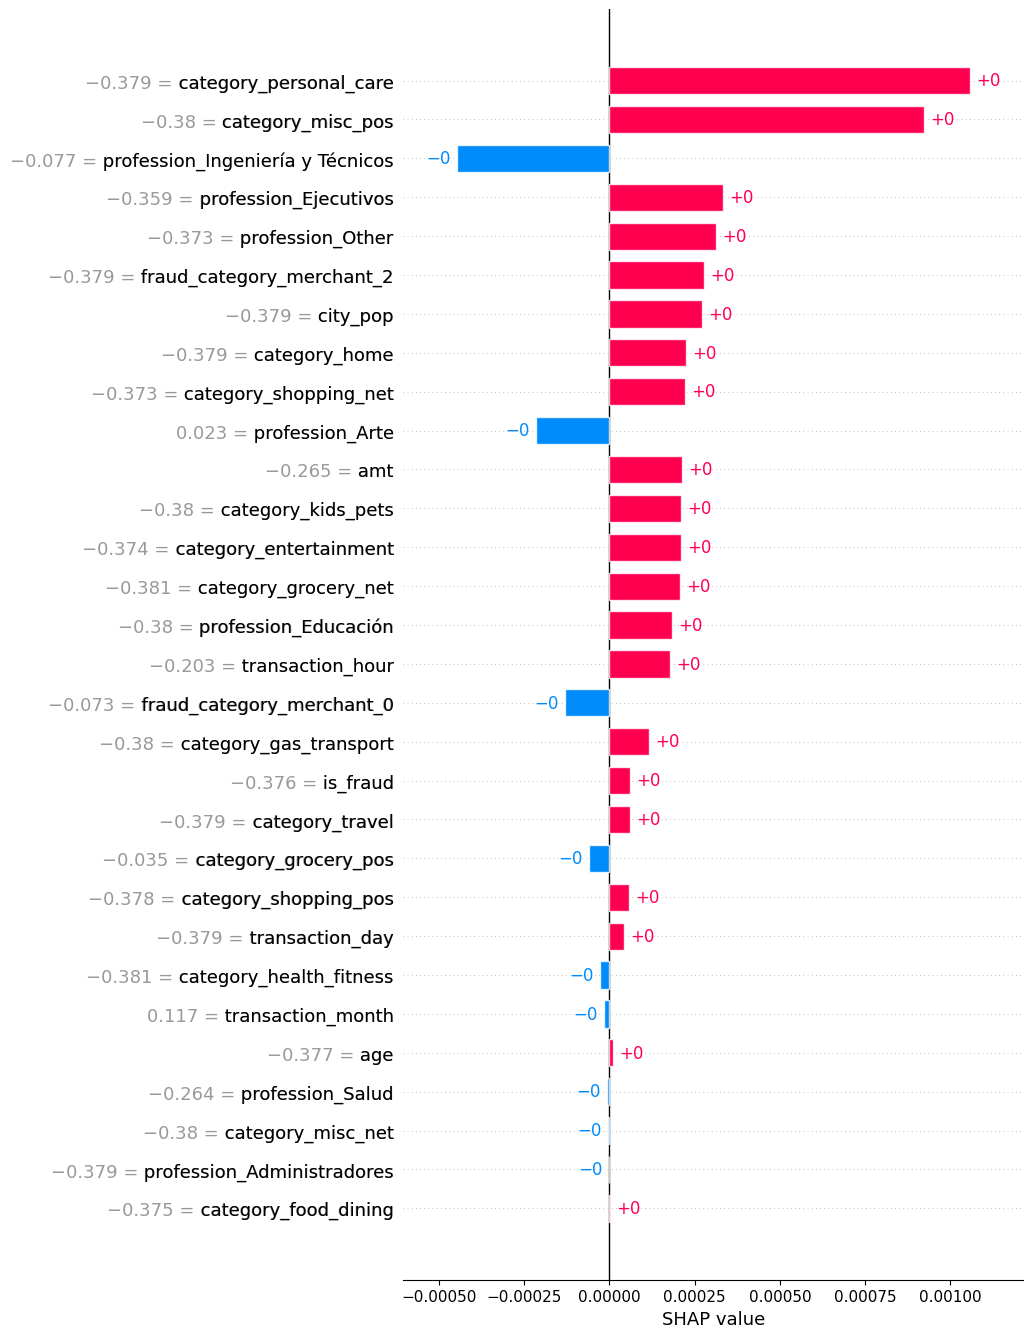

In [ ]:
print("clase 1")
shap.plots.bar(shap_values_class_1, max_display=X_train.shape[1])

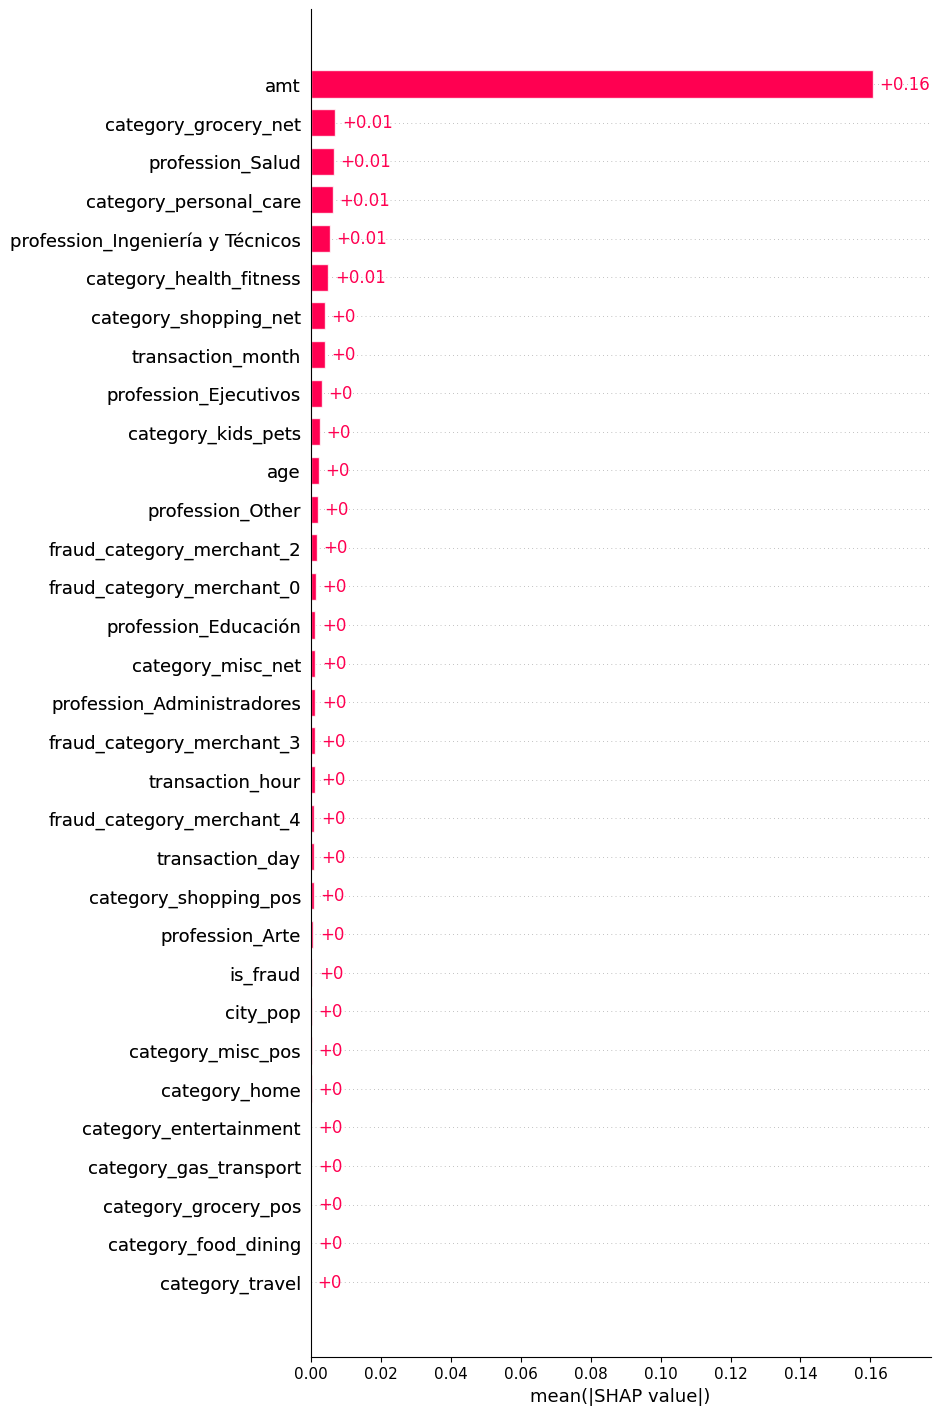

In [ ]:
shap.plots.bar(shap_values_exp, max_display=X_train.shape[0])